In [1]:
import os.path
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from gensim.downloader import load
import gensim
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist #used to determine number of tokens
from gensim.models import Word2Vec

In [2]:
with open("goemotions.json", "r") as read_content:
    file = pd.read_json(read_content)

Taking count of all sentiment and emotion tags respectively associated with Reddit posts. Then creating a dictionary to create key-value pairings.

In [3]:
print(file.loc[file[0]=='They have THE BEST tortillas too. Made right in front of you. Mmmmmm!'])

                                                        0           1  \
264     They have THE BEST tortillas too. Made right i...     neutral   
23540   They have THE BEST tortillas too. Made right i...     neutral   
73369   They have THE BEST tortillas too. Made right i...  admiration   
86008   They have THE BEST tortillas too. Made right i...  admiration   
115605  They have THE BEST tortillas too. Made right i...    approval   

               2  
264      neutral  
23540    neutral  
73369   positive  
86008   positive  
115605  positive  


In [4]:
sentiment = file[2].value_counts().to_dict()
sentiment_values = sentiment.keys()
sentiment_frequency = sentiment.values()

In [5]:
emotion = file[1].value_counts().to_dict()
emotion_values = emotion.keys()
emotion_frequency = emotion.values()

In [6]:
# print(emotion)
# emotion_list = list(emotion_frequency)
# pdP = pd.Series(emotion_list)
# print(pdP.describe())

In [7]:
# print(sentiment)
# sentiment_list = list(sentiment_frequency)
# pdP = pd.Series(sentiment_list) 
# print(pdP.describe())

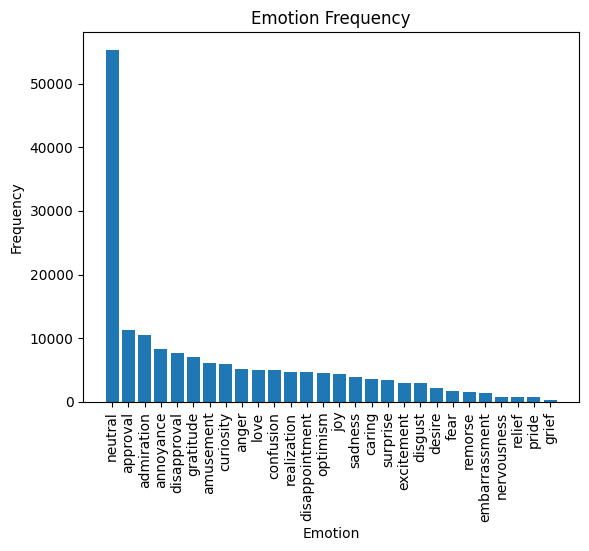

In [8]:
plt.xlabel("Emotion")
plt.ylabel("Frequency")
plt.title("Emotion Frequency")
plt.xticks(rotation= 90) #done for readbility purposes
plt.bar(emotion_values, emotion_frequency)
plt.savefig("bar_emotion.png")
plt.show()

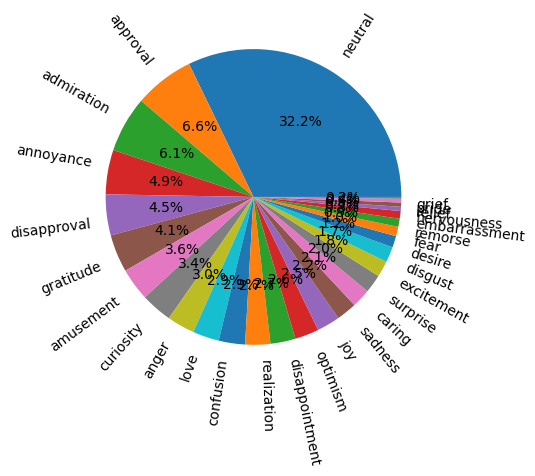

In [9]:
emotionLabels = []
sizes = []
for x, y in emotion.items():
    emotionLabels.append(x)
    sizes.append(y)
plt.pie(sizes, labels=emotionLabels, rotatelabels = True, autopct ='%1.1f%%')
plt.savefig("pie_emotion.png")
plt.show()


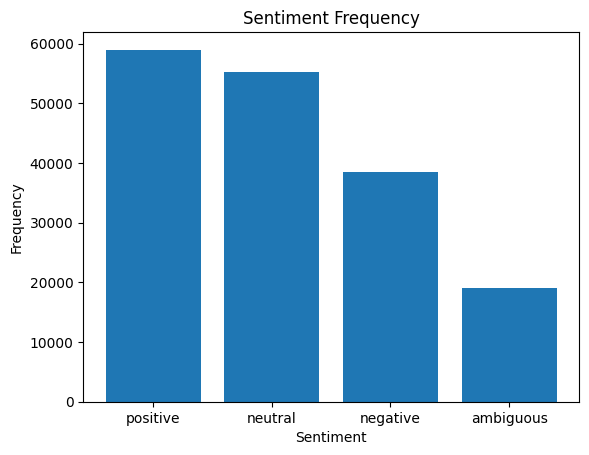

In [10]:
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.title("Sentiment Frequency")
plt.bar(sentiment_values, sentiment_frequency)
plt.savefig("bar_sentiment.png")
plt.show()

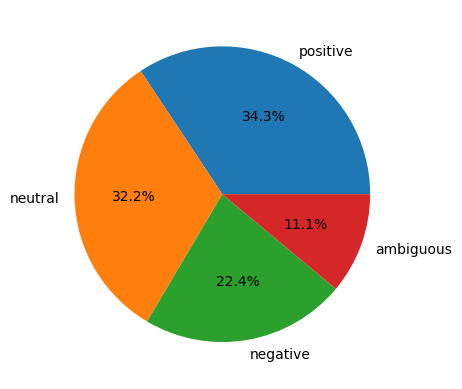

In [11]:
sentimentLabels = []
sizes = []
for x, y in sentiment.items():
    sentimentLabels.append(x)
    sizes.append(y)
plt.pie(sizes, labels=sentimentLabels, autopct ='%1.1f%%')
plt.savefig("pie_sentiment.png")
plt.show()


Plotting of Frequency vs. Emotion and Frequency vs. Sentiment <br>
Source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html <br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html <br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html

<h1>extract tokens/words</h1>

In [12]:
post = file[0].tolist()
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(post)
# vectorizer.get_feature_names_out()

In [13]:
#print(f"The number of unique words is {len(X.toarray()[0])} unique words")

Given that when X.toarray() is used, the occurrences of words in a post is counted for example <br> "This document is the second document."<br> the word document is used twice [0 2 0 1 0 1 1 0 1] mapping to the array of unique words ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
<br>
Sources: <br>
https://stackoverflow.com/questions/27488446/how-do-i-get-word-frequency-in-a-corpus-using-scikit-learn-countvectorizer
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [14]:
post = file[0]
vectorizer = CountVectorizer()
#vectorize posts into words that were used
# file[0] = vectorizer.fit_transform(post)
X = vectorizer.fit_transform(file[0])
# X_features =vectorizer.get_feature_names_out()

leEmo = preprocessing.LabelEncoder()
leSent = preprocessing.LabelEncoder()
#list(le.inverse_transform([2, 2, 1]))
encodedEmo = leEmo.fit_transform(file[1]) #change 0 to the column of emotions with no separation
#vectorize sentiments
encodedSentiment = leSent.fit_transform(file[2]) #change 0 to the column of sentiment with no separation

<h2>2.2 Training and Test data split</h2>

In [15]:
#Question 2.2
X_train,X_test,yemo_train, yemo_test,ysent_train, ysent_test = train_test_split(X,encodedEmo,encodedSentiment, test_size = 0.2, train_size=0.8)

In [16]:
print(len(yemo_train))

137456


In [17]:
def metrics(true_y,prediction_y):
    print(f"Accuracy: {accuracy_score(y_true=true_y,y_pred= prediction_y)}")
    print(f"Precision (Weighted): {precision_score(y_true=true_y,y_pred= prediction_y, average='weighted')}")
    print(f"F1 Score (Weighted): {f1_score(y_true=true_y,y_pred= prediction_y,average='weighted')}")
    print(f"F1 Score (Macro): {f1_score(y_true=true_y,y_pred= prediction_y,average='macro')}")
    print(classification_report(y_true=true_y,y_pred= prediction_y, zero_division='warn'))
    confusion_matrix(y_true=true_y,y_pred= prediction_y)

<h2>Multinomial Naive Bayes Classifier (naive bayes.MultinomialNB.html)
with the default parameters.</h2>

Source: https://www.delftstack.com/howto/python/how-to-get-dictionary-keys-as-a-list-in-python/

In [18]:
classifier = MultinomialNB()
if (os.path.exists('models/MNB1_model.pickle')):
    pickle_in = open('models/MNB1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, yemo_train)
    with open('models/MNB1_model.pickle','wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/MNB1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)

if (os.path.exists('models/MNB2_model.pickle')):
    pickle_in = open('models/MNB2_model.pickle','rb')
    clf2 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train,ysent_train)
    with open('models/MNB2_model.pickle','wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/MNB2_model.pickle','rb')
    clf2 = pickle.load(pickle_in)


pickle file used
pickle file used


Score for Emotion: 0.43210918402979864
Accuracy: 0.43210918402979864
Precision (Weighted): 0.4852490111995334
F1 Score (Weighted): 0.3643344779502606
F1 Score (Macro): 0.22155250014023092
              precision    recall  f1-score   support

           0       0.55      0.51      0.53      2148
           1       0.61      0.36      0.46      1241
           2       0.50      0.16      0.25      1033
           3       0.43      0.14      0.21      1602
           4       0.45      0.17      0.24      2307
           5       0.50      0.09      0.16       750
           6       0.52      0.09      0.16      1003
           7       0.55      0.16      0.25      1218
           8       0.55      0.06      0.11       435
           9       0.53      0.08      0.14       932
          10       0.45      0.14      0.21      1581
          11       0.70      0.12      0.20       632
          12       0.80      0.03      0.06       276
          13       0.46      0.06      0.11       581
 

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_s

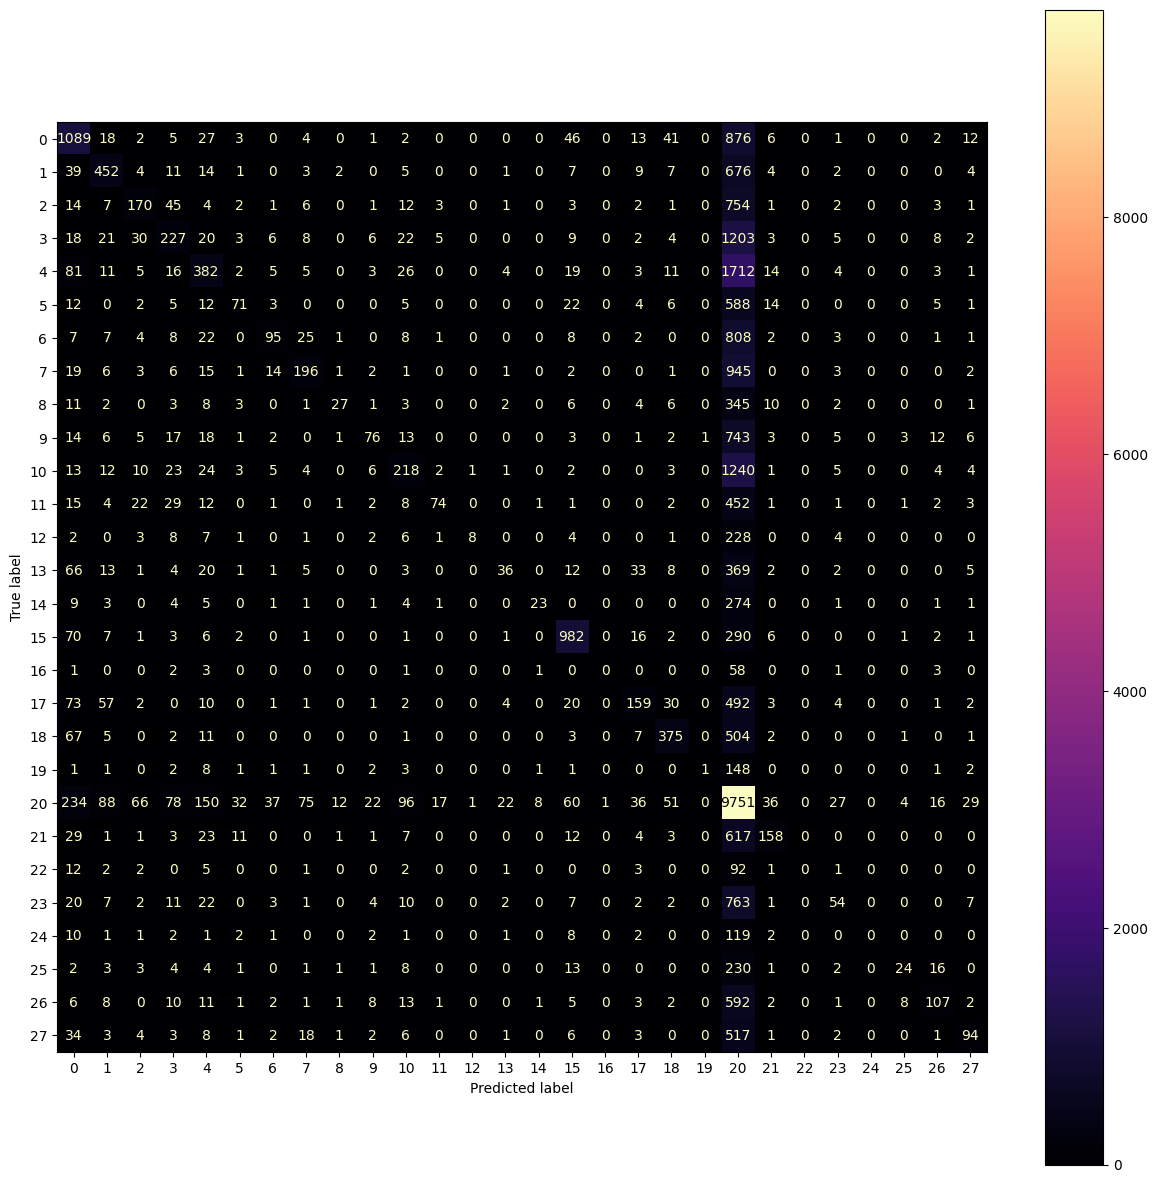

In [19]:
y_emo_predict = clf1.predict(X_test)

print(f"Score for Emotion: {clf1.score(X_test,yemo_test)}")
metrics(yemo_test,y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test,y_pred= y_emo_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax,cmap='magma')

Score for Sentiment: 0.6073798160866023
Accuracy: 0.6073798160866023
Precision (Weighted): 0.6035034181003323
F1 Score (Weighted): 0.6008667411850125
F1 Score (Macro): 0.5687165092254882
              precision    recall  f1-score   support

           0       0.57      0.32      0.41      3846
           1       0.61      0.60      0.60      7728
           2       0.55      0.56      0.56     10949
           3       0.66      0.74      0.70     11841

    accuracy                           0.61     34364
   macro avg       0.60      0.56      0.57     34364
weighted avg       0.60      0.61      0.60     34364



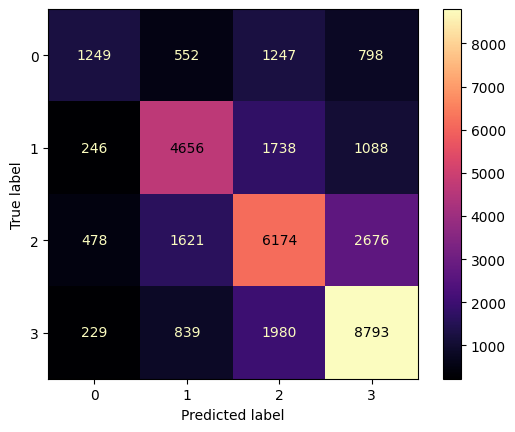

In [20]:
y_sent_predict = clf2.predict(X_test)

print(f"Score for Sentiment: {clf2.score(X_test,ysent_test)}")
metrics(ysent_test,y_sent_predict)
ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')

<h2>cross validation</h2>
<body>from sklearn.model_selection import cross_val_score</body>

<h2>Decision Tree (tree.DecisionTreeClassifier) with the default parameters.</h2>

In [21]:
classifier = DecisionTreeClassifier()
if (os.path.exists('models/DT1_model.pickle')):
    pickle_in = open('models/DT1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, yemo_train)
    with open('models/DT1_model.pickle','wb') as f:
            pickle.dump(classifier, f)
    pickle_in = open('models/DT1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)


if (os.path.exists('models/DT2_model.pickle')):

    pickle_in = open('models/DT2_model.pickle','rb')
    clf2 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train,ysent_train)
    with open('models/DT2_model.pickle','wb') as f:
            pickle.dump(classifier, f)
    pickle_in = open('models/DT2_model.pickle','rb')
    clf2 = pickle.load(pickle_in)


pickle file used
pickle file used


Score for Emotion: 0.5926551041787917
Accuracy: 0.5926551041787917
Precision (Weighted): 0.6090281757315249
F1 Score (Weighted): 0.5900611512746603
F1 Score (Macro): 0.5185435808917634
              precision    recall  f1-score   support

           0       0.57      0.79      0.66      2148
           1       0.57      0.80      0.67      1241
           2       0.44      0.70      0.54      1033
           3       0.38      0.57      0.46      1602
           4       0.46      0.57      0.51      2307
           5       0.49      0.55      0.52       750
           6       0.49      0.56      0.52      1003
           7       0.57      0.59      0.58      1218
           8       0.53      0.54      0.53       435
           9       0.45      0.47      0.46       932
          10       0.56      0.48      0.51      1581
          11       0.56      0.41      0.47       632
          12       0.48      0.44      0.46       276
          13       0.50      0.43      0.46       581
    

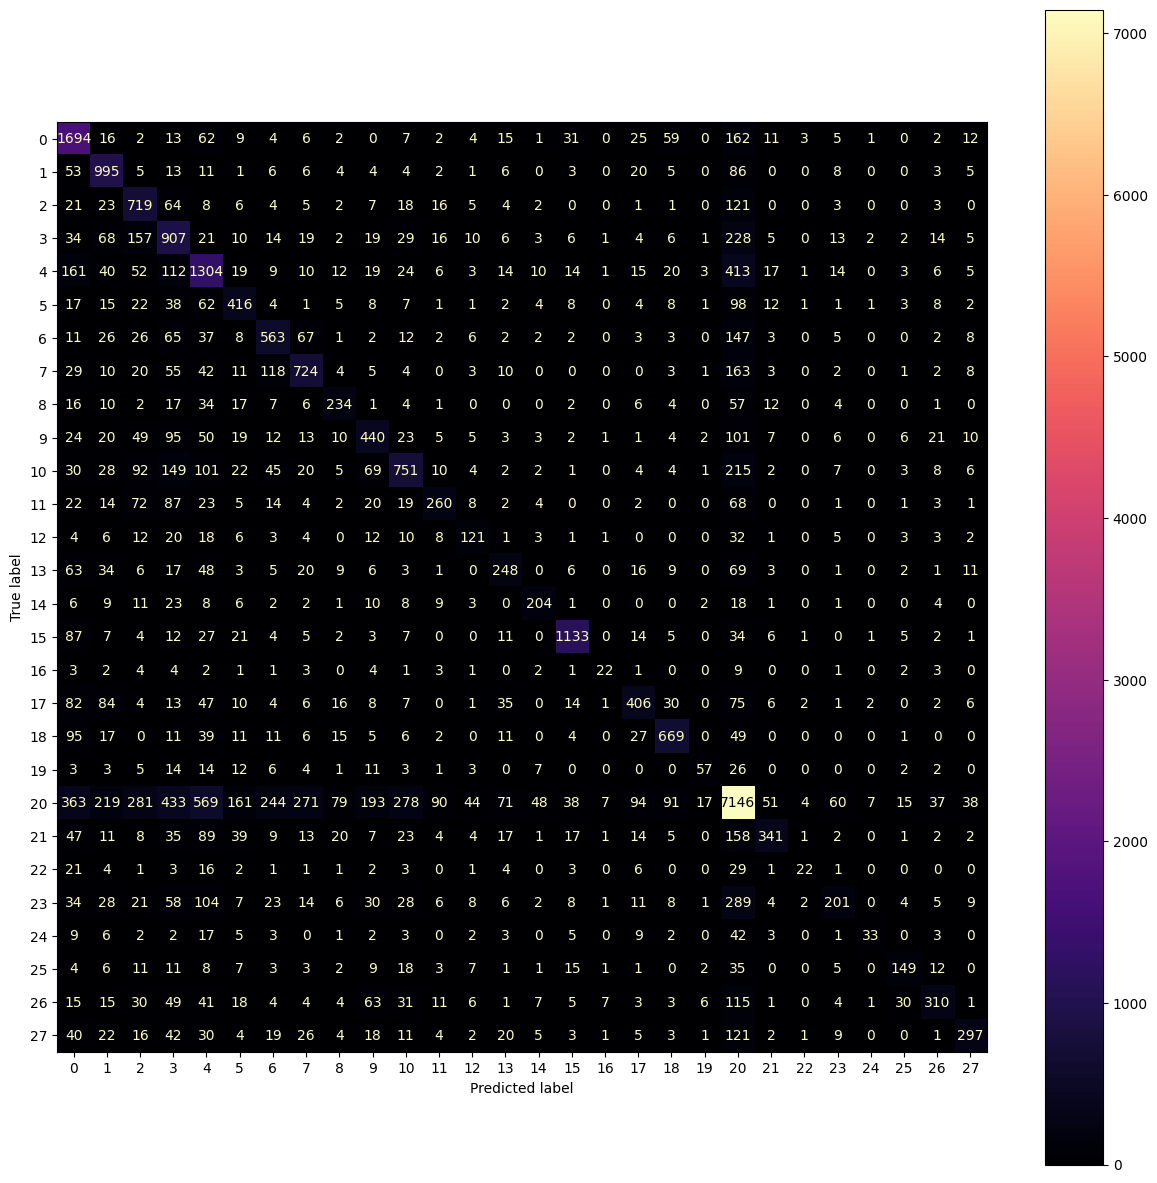

In [22]:
y_emo_predict = clf1.predict(X_test)

print(f"Score for Emotion: {clf1.score(X_test,yemo_test)}")
metrics(yemo_test,y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test,y_pred= y_emo_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax,cmap='magma')


Score for Sentiment: 0.7159236410196718
Accuracy: 0.7159236410196718
Precision (Weighted): 0.7275790764844591
F1 Score (Weighted): 0.7182620513570593
F1 Score (Macro): 0.7028912743925448
              precision    recall  f1-score   support

           0       0.56      0.72      0.63      3846
           1       0.67      0.78      0.72      7728
           2       0.70      0.66      0.68     10949
           3       0.84      0.73      0.78     11841

    accuracy                           0.72     34364
   macro avg       0.69      0.72      0.70     34364
weighted avg       0.73      0.72      0.72     34364



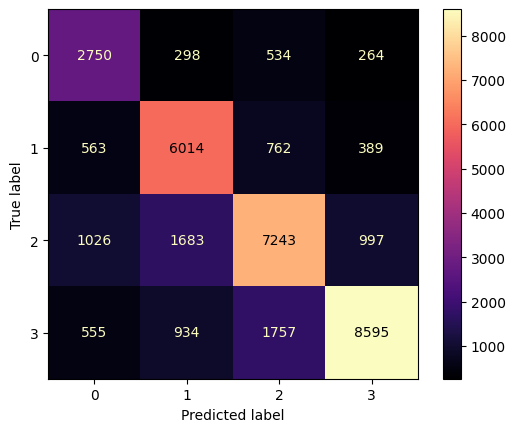

In [23]:
y_sent_predict = clf2.predict(X_test)

print(f"Score for Sentiment: {clf2.score(X_test,ysent_test)}")
metrics(ysent_test,y_sent_predict)
ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')

<h2>Multi-Layered Perceptron (neural network.MLPClassifier) with the default parameters.</h2>

In [24]:
classifier = MLPClassifier()
if (os.path.exists('models/MLP1_model.pickle')):
    pickle_in = open('models/MLP1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    MLP1 = classifier.fit(X_train, yemo_train)
    with open('models/MLP1_model.pickle','wb') as f:
            pickle.dump(classifier, f)
    pickle_in = open('models/MLP1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)

if (os.path.exists('models/MLP2_model.pickle')):
    pickle_in = open('models/MLP2_model.pickle','rb')
    clf2 = pickle.load(pickle_in)
    print("pickle file used")
else:
    MLP2 = classifier.fit(X_train,ysent_train)
    with open('models/MLP2_model.pickle','wb') as f:
            pickle.dump(classifier, f)
    pickle_in = open('models/MLP2_model.pickle','rb')
    clf2 = pickle.load(pickle_in)

pickle file used
pickle file used


In [25]:
print(np.shape(X_train))
print(np.shape(yemo_train))

(137456, 30449)
(137456,)


Score for Emotion: 0.5728669537888488
Accuracy: 0.5728669537888488
Precision (Weighted): 0.5665657410179737
F1 Score (Weighted): 0.5672718709709358
F1 Score (Macro): 0.5051410974029968
              precision    recall  f1-score   support

           0       0.64      0.67      0.66      2148
           1       0.63      0.67      0.65      1241
           2       0.52      0.51      0.51      1033
           3       0.46      0.40      0.42      1602
           4       0.48      0.38      0.43      2307
           5       0.50      0.44      0.47       750
           6       0.51      0.45      0.48      1003
           7       0.56      0.48      0.52      1218
           8       0.44      0.53      0.48       435
           9       0.44      0.41      0.42       932
          10       0.49      0.47      0.48      1581
          11       0.52      0.44      0.48       632
          12       0.46      0.44      0.45       276
          13       0.41      0.39      0.40       581
    

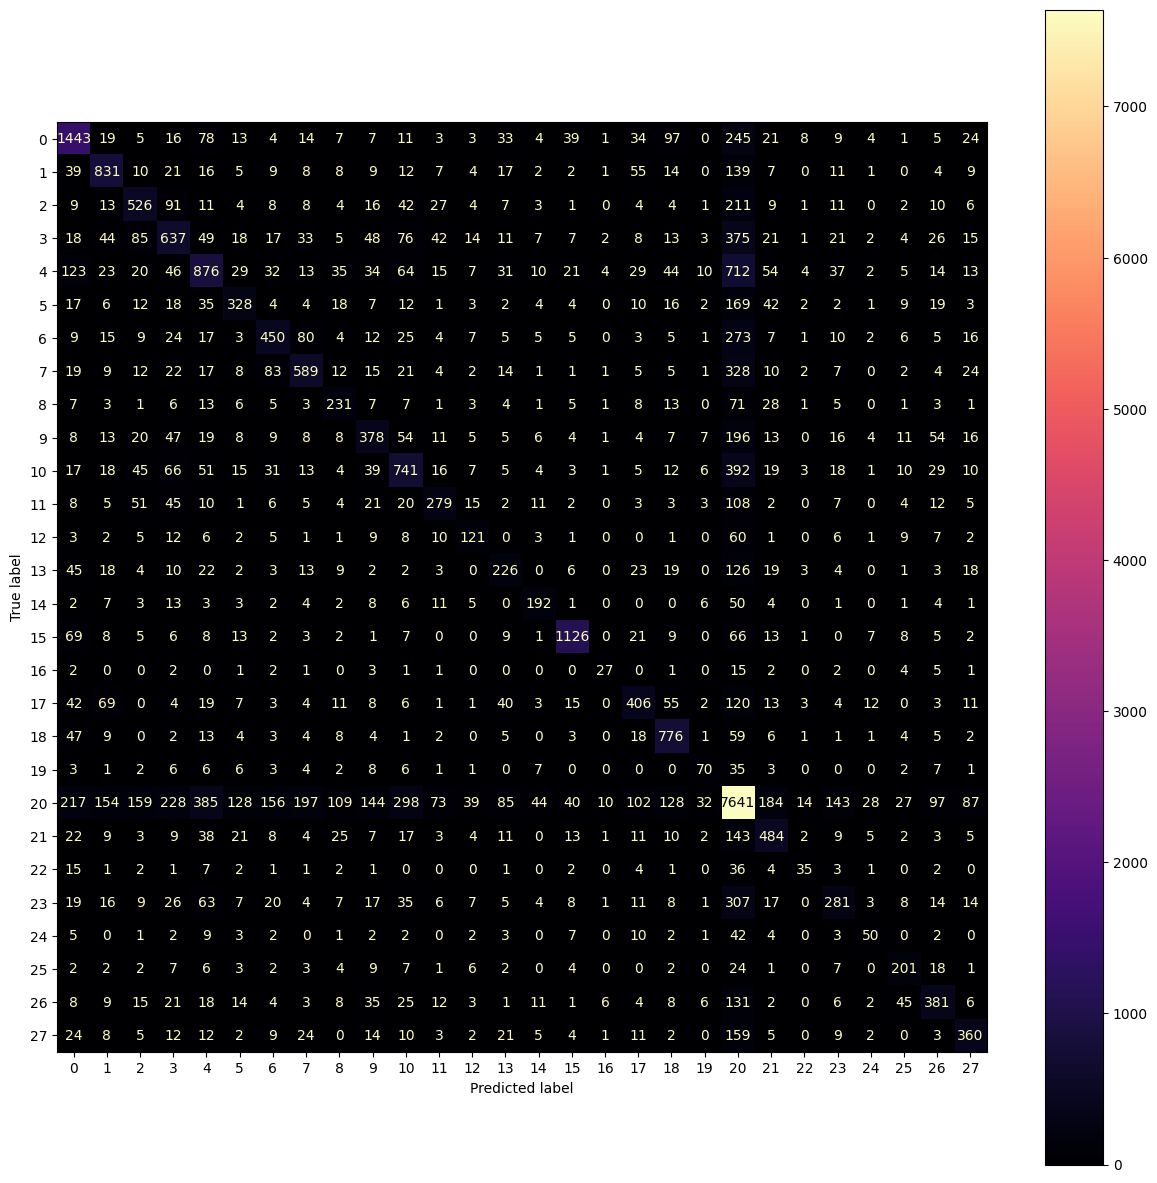

In [26]:
y_emo_predict = clf1.predict(X_test)

print(f"Score for Emotion: {clf1.score(X_test,yemo_test)}")
metrics(yemo_test,y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test,y_pred= y_emo_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax,cmap='magma')

Score for Sentiment: 0.5581131416598766
Accuracy: 0.5581131416598766
Precision (Weighted): 0.5665808598559647
F1 Score (Weighted): 0.5426024033686179
F1 Score (Macro): 0.4832271065515321
              precision    recall  f1-score   support

           0       0.54      0.13      0.21      3846
           1       0.57      0.47      0.51      7728
           2       0.47      0.64      0.54     10949
           3       0.66      0.68      0.67     11841

    accuracy                           0.56     34364
   macro avg       0.56      0.48      0.48     34364
weighted avg       0.57      0.56      0.54     34364



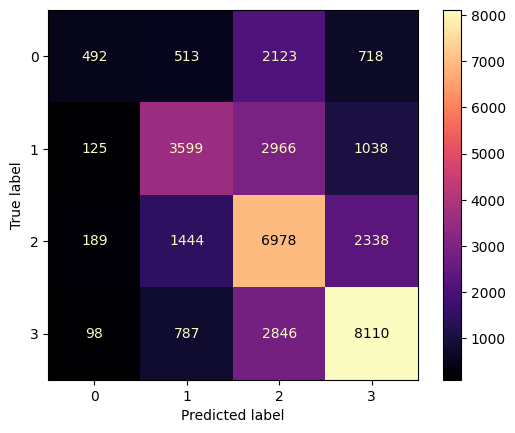

In [27]:
y_sent_predict = clf2.predict(X_test)

print(f"Score for Sentiment: {clf2.score(X_test,ysent_test)}")
metrics(ysent_test,y_sent_predict)
ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')

<h2>Multinomial Naive Bayes Classifier found using GridSearchCV</h2>

input parameter requires a model object

using the following alpha parameters 0.5,0,0.36,1


In [28]:
parameters = {"alpha":(0.5,0,0.36,1)}
clfMNB = MultinomialNB()

classifier = GridSearchCV(estimator=clfMNB, param_grid=parameters,n_jobs=-1)

if (os.path.exists('models/MNB1GridCV_model.pickle')):
    pickle_in = open('models/MNB1GridCV_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, yemo_train)
    with open('models/MNB1GridCV_model.pickle','wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/MNB1GridCV_model.pickle','rb')
    clf1 = pickle.load(pickle_in)

if (os.path.exists('models/MNB2GridCV_model.pickle')):
    pickle_in = open('models/MNB2GridCV_model.pickle','rb')
    clf2 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train,ysent_train)
    with open('models/MNB2GridCV_model.pickle','wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/MNB2GridCV_model.pickle','rb')
    clf2 = pickle.load(pickle_in)

pickle file used
pickle file used


<h2>Decision Tree Classifier found using GridSearchCV</h2>

input parameter requires a model object

using the various value for the following parameters: criterion, max_depth, min_samples


In [29]:
parameters = {"criterion":("gini","entropy"),"max_depth":(100,3),"min_samples_split":(12,5,30)}
clfDT = DecisionTreeClassifier()

classifier = GridSearchCV(estimator=clfDT, param_grid=parameters,n_jobs=-1)

if (os.path.exists('models/DT1GridCV_model.pickle')):
    pickle_in = open('models/DT1GridCV_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, yemo_train)
    with open('models/DT1GridCV_model.pickle','wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/DT1GridCV_model.pickle','rb')
    clf1 = pickle.load(pickle_in)

if (os.path.exists('models/DT2GridCV_model.pickle')):
    pickle_in = open('models/DT2GridCV_model.pickle','rb')
    clf2 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train,ysent_train)
    with open('models/DT2GridCV_model.pickle','wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/DT2GridCV_model.pickle','rb')
    clf2 = pickle.load(pickle_in)

pickle file used
pickle file used


Best estimator (Emotion): DecisionTreeClassifier(max_depth=100, min_samples_split=30), Best Score: 0.4044639513068846
Accuracy: 0.5003492026539401
Precision (Weighted): 0.5050688804901152
F1 Score (Weighted): 0.4597708254669744
F1 Score (Macro): 0.3641224081605569
              precision    recall  f1-score   support

           0       0.58      0.54      0.56      2148
           1       0.61      0.67      0.64      1241
           2       0.47      0.34      0.40      1033
           3       0.36      0.19      0.25      1602
           4       0.41      0.18      0.25      2307
           5       0.49      0.22      0.30       750
           6       0.49      0.25      0.33      1003
           7       0.51      0.24      0.32      1218
           8       0.47      0.26      0.34       435
           9       0.44      0.17      0.25       932
          10       0.43      0.22      0.29      1581
          11       0.59      0.24      0.34       632
          12       0.46      0.1

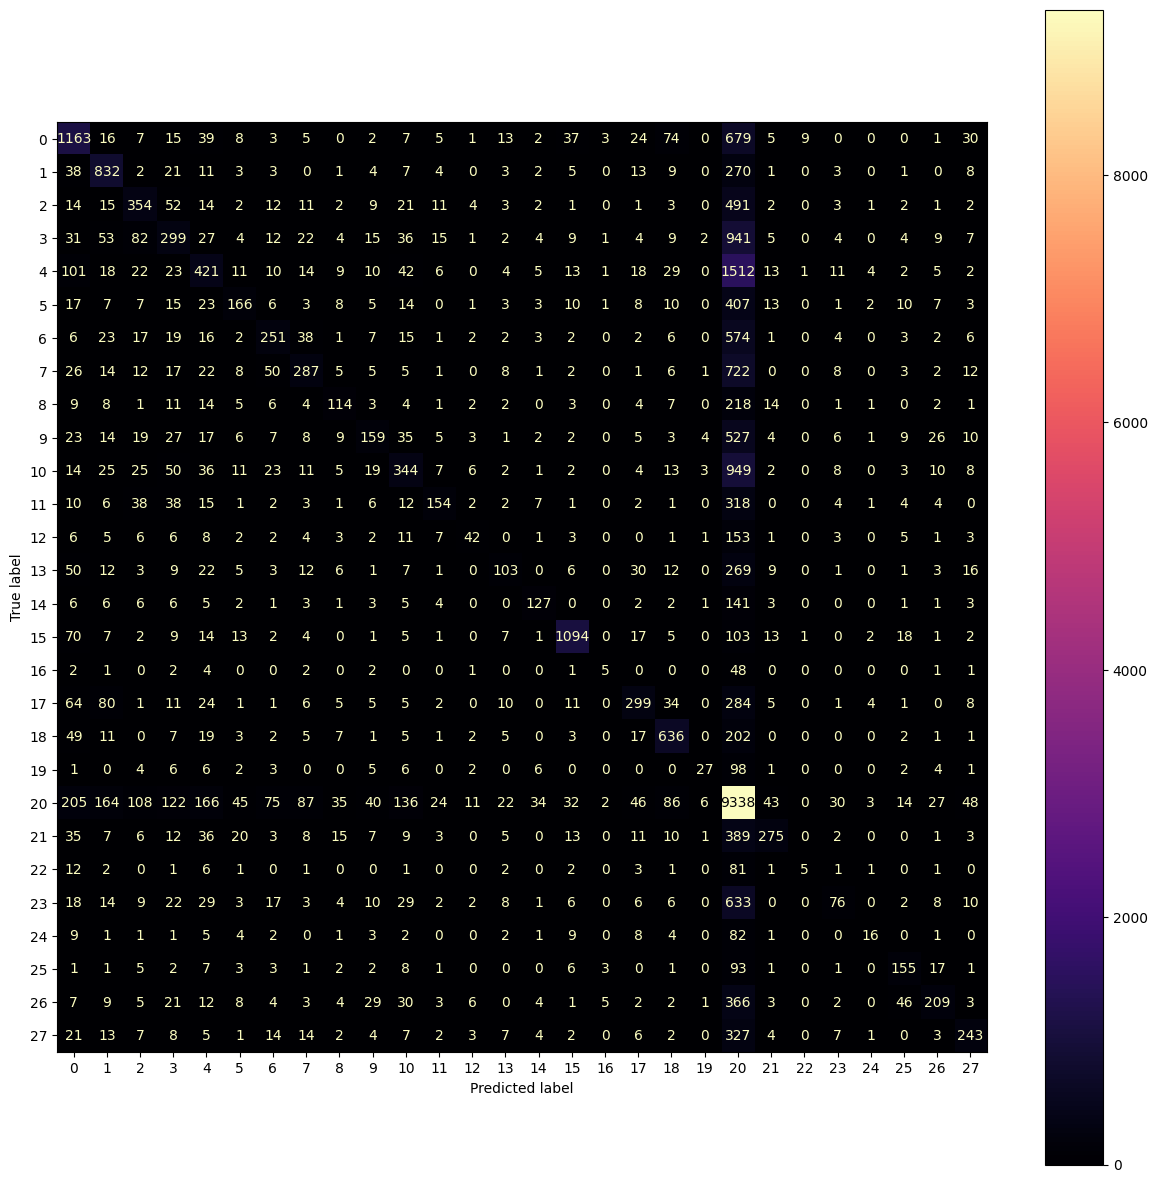

In [30]:
y_emo_predict = clf1.best_estimator_.predict(X_test)

print(f"Best estimator (Emotion): {clf1.best_estimator_}, Best Score: {clf1.best_score_}")
metrics(yemo_test,y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test,y_pred= y_emo_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax,cmap='magma')

Best estimator (Sentiment): DecisionTreeClassifier(max_depth=100, min_samples_split=5), Best Score: 0.515219404662324
Accuracy: 0.6195728087533465
Precision (Weighted): 0.6670075761108194
F1 Score (Weighted): 0.6218204629869815
F1 Score (Macro): 0.5963664750377653
              precision    recall  f1-score   support

           0       0.55      0.44      0.49      3846
           1       0.70      0.51      0.59      7728
           2       0.50      0.79      0.61     10949
           3       0.84      0.59      0.70     11841

    accuracy                           0.62     34364
   macro avg       0.65      0.58      0.60     34364
weighted avg       0.67      0.62      0.62     34364



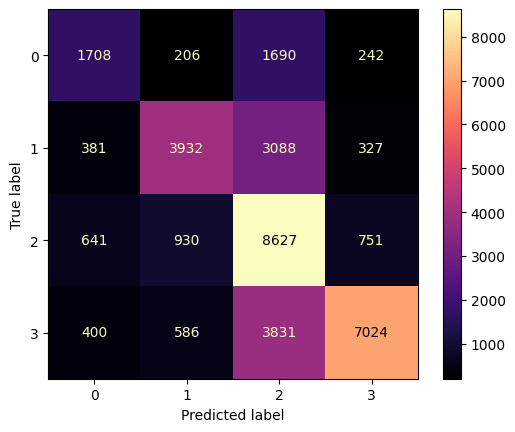

In [31]:
y_sent_predict = clf2.best_estimator_.predict(X_test)

print(f"Best estimator (Sentiment): {clf2.best_estimator_}, Best Score: {clf2.best_score_}")
metrics(ysent_test,y_sent_predict)
ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')

<h2>Multi-Layered Perceptron found using GridSearchCV</h2>

input parameter requires a model object

using the various value for the following parameters: activation, architectures, solvers
Hidden layers <a href="https://datascience.stackexchange.com/questions/19768/how-to-implement-pythons-mlpclassifier-with-gridsearchcv">Link</a>

<b>Unable to converge</b>


In [32]:
parameters = {"activation":("identity", "logistic", "tanh", "relu"),"hidden_layer_sizes":((5,5),(5,10)), "solver":("adam","sgd")}
#currently 5 neurons then 5 neurons and 5 neurons then 10 neurons in the hidden layer
clfMLP = MLPClassifier(early_stopping=True, verbose=True,max_iter=5)
classifier = GridSearchCV(estimator=clfMLP, param_grid=parameters,n_jobs=-1)
skip=False
if(not skip):
    if (os.path.exists('models/MLP1GridCV_model.pickle')):
        pickle_in = open('models/MLP1GridCV_model.pickle','rb')
        clf1 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        classifier = classifier.fit(X_train, yemo_train)
        with open('models/MLP1GridCV_model.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/MLP1GridCV_model.pickle','rb')
        clf1 = pickle.load(pickle_in)

    if (os.path.exists('models/MLP2GridCV_model.pickle')):
        pickle_in = open('models/MLP2GridCV_model.pickle','rb')
        clf2 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        classifier = classifier.fit(X_train,ysent_train)
        with open('models/MLP2GridCV_model.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/MLP2GridCV_model.pickle','rb')
        clf2 = pickle.load(pickle_in)
else:
    print("skipped")

pickle file used
pickle file used


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.1.2 wh

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.4532650448143406
Precision (Weighted): 0.41844674232304696
F1 Score (Weighted): 0.3746738745490646
F1 Score (Macro): 0.2383732544877602
              precision    recall  f1-score   support

           0       0.52      0.54      0.53      2148
           1       0.52      0.64      0.58      1241
           2       0.41      0.25      0.31      1033
           3       0.18      0.04      0.07      1602
           4       0.42      0.11      0.17      2307
           5       0.62      0.01      0.01       750
           6       0.48      0.11      0.18      1003
           7       0.45      0.18      0.26      1218
           8       0.67      0.07      0.13       435
           9       0.00      0.00      0.00       932
          10       0.27      0.10      0.15      1581
          11       0.58      0.03      0.05       632
          12       0.00      0.00      0.00       276
          13       0.45      0.04      0.08       581
          14       0.51      0.37      0.

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_s

              precision    recall  f1-score   support

           0       0.52      0.54      0.53      2148
           1       0.52      0.64      0.58      1241
           2       0.41      0.25      0.31      1033
           3       0.18      0.04      0.07      1602
           4       0.42      0.11      0.17      2307
           5       0.62      0.01      0.01       750
           6       0.48      0.11      0.18      1003
           7       0.45      0.18      0.26      1218
           8       0.67      0.07      0.13       435
           9       0.00      0.00      0.00       932
          10       0.27      0.10      0.15      1581
          11       0.58      0.03      0.05       632
          12       0.00      0.00      0.00       276
          13       0.45      0.04      0.08       581
          14       0.51      0.37      0.43       329
          15       0.76      0.82      0.79      1392
          16       0.00      0.00      0.00        70
          17       0.42    

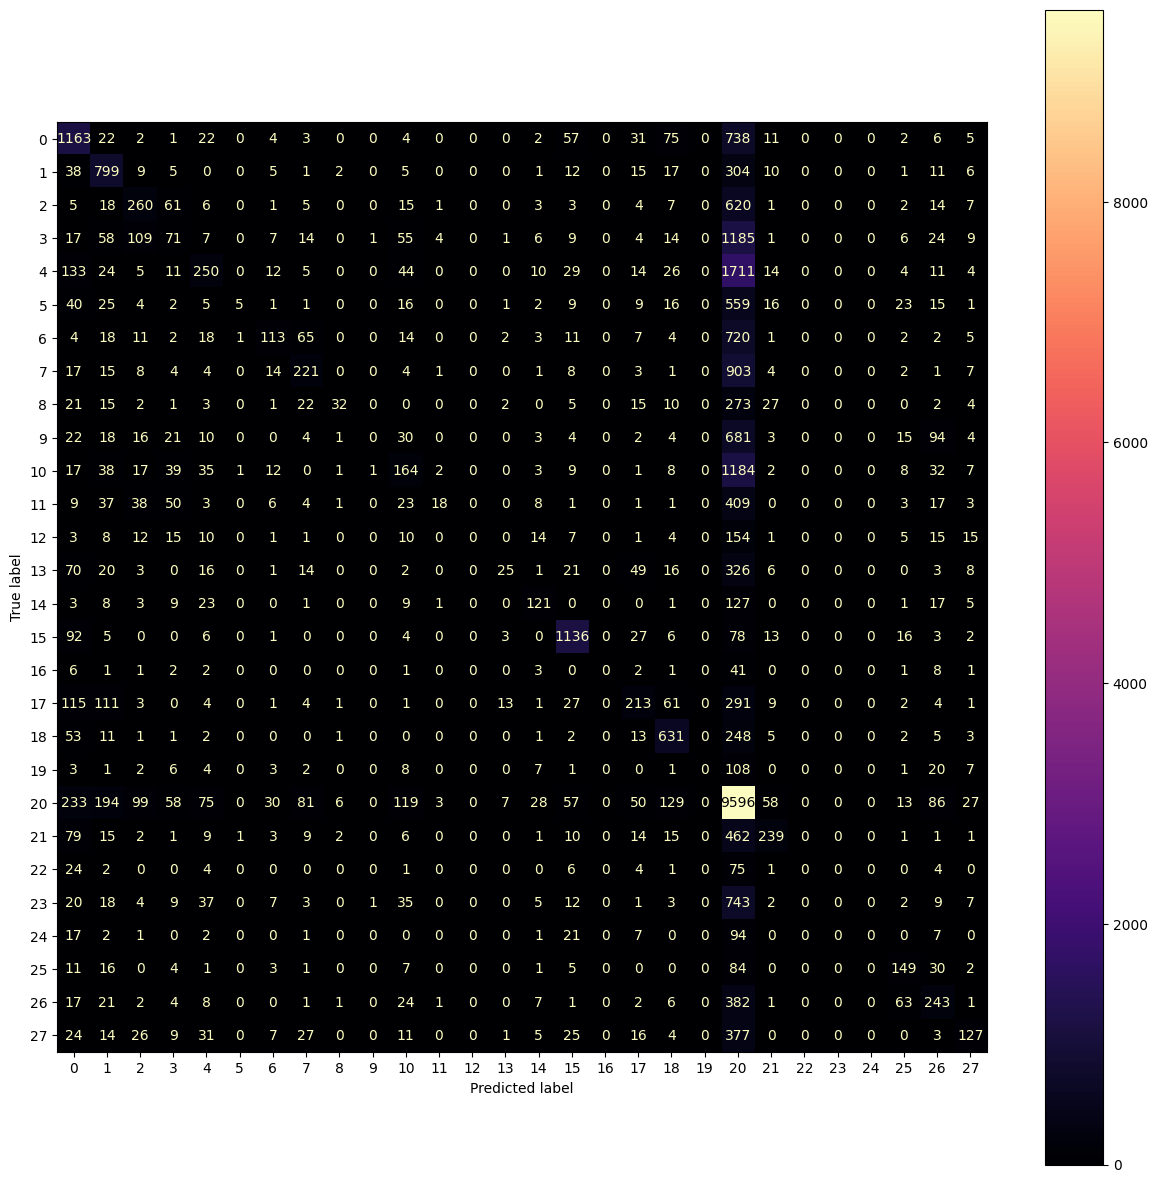

In [33]:
if (os.path.exists('models/MLP1GridCV_model.pickle') and not skip):
    y_emo_predict = clf1.best_estimator_.predict(X_test)
    metrics(yemo_test,y_emo_predict)
    print(f"Best estimator (Emotion): {clf1.best_estimator_}, Best Score: {clf1.best_score_}")
    metrics(yemo_test,y_emo_predict)
    cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test,y_pred= y_emo_predict))
    fig, ax = plt.subplots(figsize=(15,15))
    cmp.plot(ax=ax,cmap='magma')
else:
    print("skipped")

Accuracy: 0.6331917122570132
Precision (Weighted): 0.632899382867964
F1 Score (Weighted): 0.6273470672223811
F1 Score (Macro): 0.5913048378448913
              precision    recall  f1-score   support

           0       0.60      0.32      0.42      3846
           1       0.64      0.60      0.62      7728
           2       0.56      0.64      0.60     10949
           3       0.71      0.75      0.73     11841

    accuracy                           0.63     34364
   macro avg       0.63      0.58      0.59     34364
weighted avg       0.63      0.63      0.63     34364

Best estimator (Sentiment): MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(5, 10), max_iter=5, verbose=True), Best Score: 0.5612705192148834


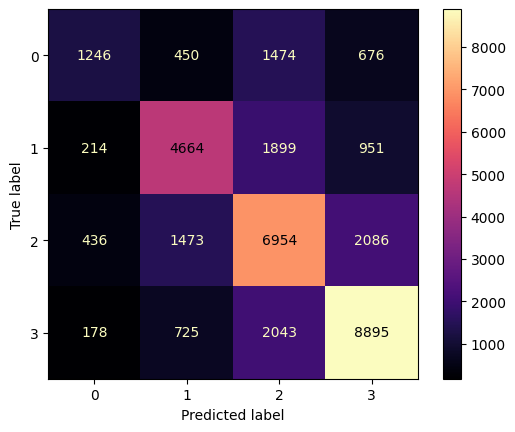

In [34]:
if (os.path.exists('models/MLP2GridCV_model.pickle') and not skip):
    y_sent_predict = clf2.best_estimator_.predict(X_test)
    metrics(ysent_test,y_sent_predict)
    print(f"Best estimator (Sentiment): {clf2.best_estimator_}, Best Score: {clf2.best_score_}")
    ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')
else:
    print("skipped")

<h3>2.5</h3>
Test/Training split: 80/20 -> 50/50
Anticipated effect: increased accuracy but poor generalization


In [35]:
post = file[0]
vectorizer = CountVectorizer()
#vectorize posts into words that were used
# file[0] = vectorizer.fit_transform(post)
X = vectorizer.fit_transform(file[0])
# X_features =vectorizer.get_feature_names_out()

leEmo = preprocessing.LabelEncoder()
leSent = preprocessing.LabelEncoder()
#list(le.inverse_transform([2, 2, 1]))
encodedEmo = leEmo.fit_transform(file[1])  #change 0 to the column of emotions with no separation
#vectorize sentiments
encodedSentiment = leSent.fit_transform(file[2])  #change 0 to the column of sentiment with no separation



In [36]:
X_train, X_test, yemo_train, yemo_test, ysent_train, ysent_test = train_test_split(X, encodedEmo, encodedSentiment,test_size=0.5, train_size=0.5)

<h2>Multinomial Naive Bayes Classifier (naive bayes.MultinomialNB.html) using new test train split</h2>

In [37]:
classifier = MultinomialNB()
if (os.path.exists('models/new_split/MNB1_model_new_split.pickle')):
    pickle_in = open('models/new_split/MNB1_model_new_split.pickle', 'rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")

else:
    classifier = classifier.fit(X_train, yemo_train)
    with open('models/new_split/MNB1_model_new_split.pickle', 'wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/new_split/MNB1_model_new_split.pickle', 'rb')
    clf1 = pickle.load(pickle_in)

if (os.path.exists('models/new_split/MNB2_model_new_split.pickle')):
    pickle_in = open('models/new_split/MNB2_model_new_split.pickle', 'rb')
    clf2 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, ysent_train)
    with open('models/new_split/MNB2_model_new_split.pickle', 'wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/new_split/MNB2_model_new_split.pickle', 'rb')
    clf2 = pickle.load(pickle_in)

pickle file used
pickle file used


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator MultinomialNB from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


Score for Emotion: 0.44835292748224886
Accuracy: 0.44835292748224886
Precision (Weighted): 0.4897187210437308
F1 Score (Weighted): 0.3893567140647532
F1 Score (Macro): 0.25035134025624106
              precision    recall  f1-score   support

           0       0.54      0.54      0.54      5279
           1       0.62      0.43      0.50      3071
           2       0.53      0.21      0.30      2594
           3       0.42      0.17      0.24      4185
           4       0.45      0.18      0.26      5681
           5       0.47      0.14      0.22      1808
           6       0.55      0.13      0.22      2406
           7       0.54      0.19      0.28      2908
           8       0.62      0.08      0.14      1114
           9       0.53      0.10      0.17      2394
          10       0.44      0.16      0.24      3802
          11       0.58      0.13      0.22      1458
          12       0.62      0.04      0.07       720
          13       0.55      0.09      0.16      1506
 

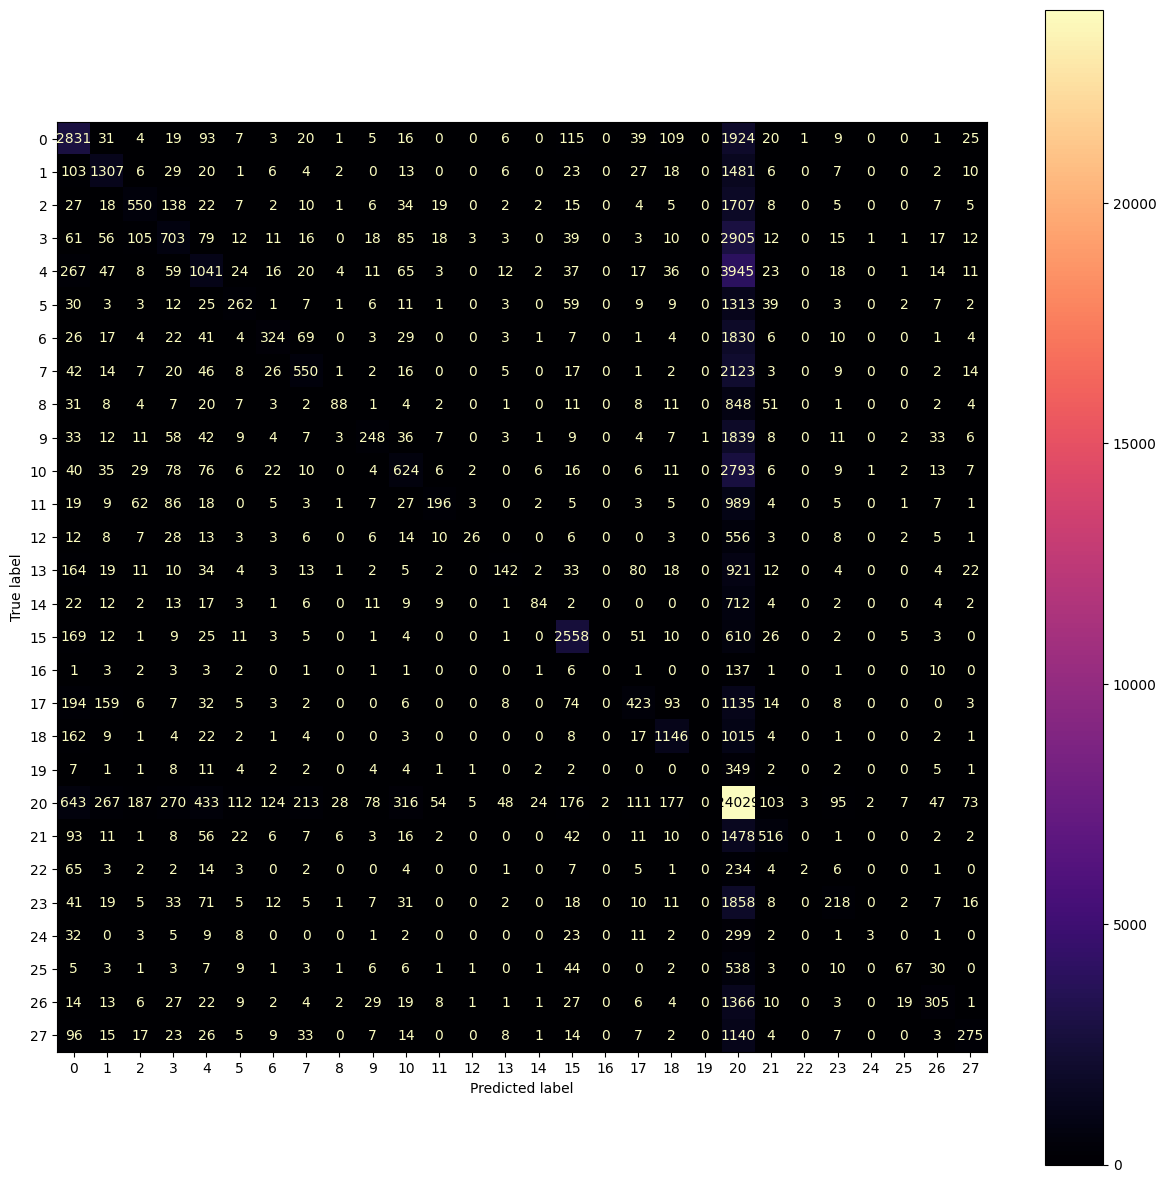

In [38]:
y_emo_predict = clf1.predict(X_test)

print(f"Score for Emotion: {clf1.score(X_test, yemo_test)}")
metrics(yemo_test, y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test, y_pred=y_emo_predict))
fig, ax = plt.subplots(figsize=(15, 15))
cmp.plot(ax=ax, cmap='magma')

Score for Sentiment: 0.6142823885461529
Accuracy: 0.6142823885461529
Precision (Weighted): 0.6092429353223557
F1 Score (Weighted): 0.6086266927656451
F1 Score (Macro): 0.5764617295966536
              precision    recall  f1-score   support

           0       0.54      0.35      0.42      9400
           1       0.61      0.61      0.61     19293
           2       0.57      0.57      0.57     27627
           3       0.67      0.75      0.70     29590

    accuracy                           0.61     85910
   macro avg       0.60      0.57      0.58     85910
weighted avg       0.61      0.61      0.61     85910



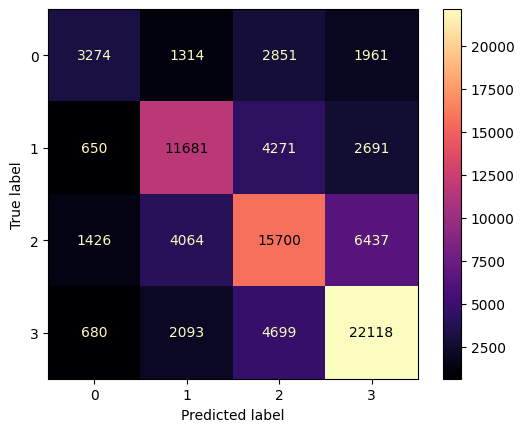

In [39]:
y_sent_predict = clf2.predict(X_test)

print(f"Score for Sentiment: {clf2.score(X_test, ysent_test)}")
metrics(ysent_test, y_sent_predict)
ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')

<h2>Decision Tree (tree.DecisionTreeClassifier) using new test train split</h2>

In [40]:
classifier = DecisionTreeClassifier()
if (os.path.exists('models/new_split/DT1_model_new_split.pickle')):
    pickle_in = open('models/new_split/DT1_model_new_split.pickle', 'rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, yemo_train)
    with open('models/new_split/DT1_model_new_split.pickle', 'wb') as f:
        pickle.dump(classifier, f)
    pickle_in = open('models/new_split/DT1_model_new_split.pickle', 'rb')
    clf1 = pickle.load(pickle_in)

if (os.path.exists('models/new_split/DT2_model_new_split.pickle')):
    pickle_in = open('models/new_split/DT2_model_new_split.pickle', 'rb')
    clf2 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, ysent_train)
    with open('models/new_split/DT2_model_new_split.pickle', 'wb') as f:
        pickle.dump(classifier, f)
    pickle_in = open('models/new_split/DT2_model_new_split.pickle', 'rb')
    clf2 = pickle.load(pickle_in)

pickle file used
pickle file used


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


Score for Emotion: 0.6203817949016412
Accuracy: 0.6203817949016412
Precision (Weighted): 0.6311108699539019
F1 Score (Weighted): 0.6150741690335804
F1 Score (Macro): 0.5396027090031329
              precision    recall  f1-score   support

           0       0.59      0.83      0.69      5279
           1       0.59      0.83      0.69      3071
           2       0.48      0.71      0.57      2594
           3       0.43      0.58      0.49      4185
           4       0.49      0.55      0.52      5681
           5       0.51      0.60      0.55      1808
           6       0.51      0.57      0.54      2406
           7       0.60      0.61      0.61      2908
           8       0.55      0.54      0.55      1114
           9       0.50      0.45      0.47      2394
          10       0.57      0.49      0.52      3802
          11       0.60      0.42      0.49      1458
          12       0.58      0.42      0.48       720
          13       0.57      0.42      0.48      1506
    

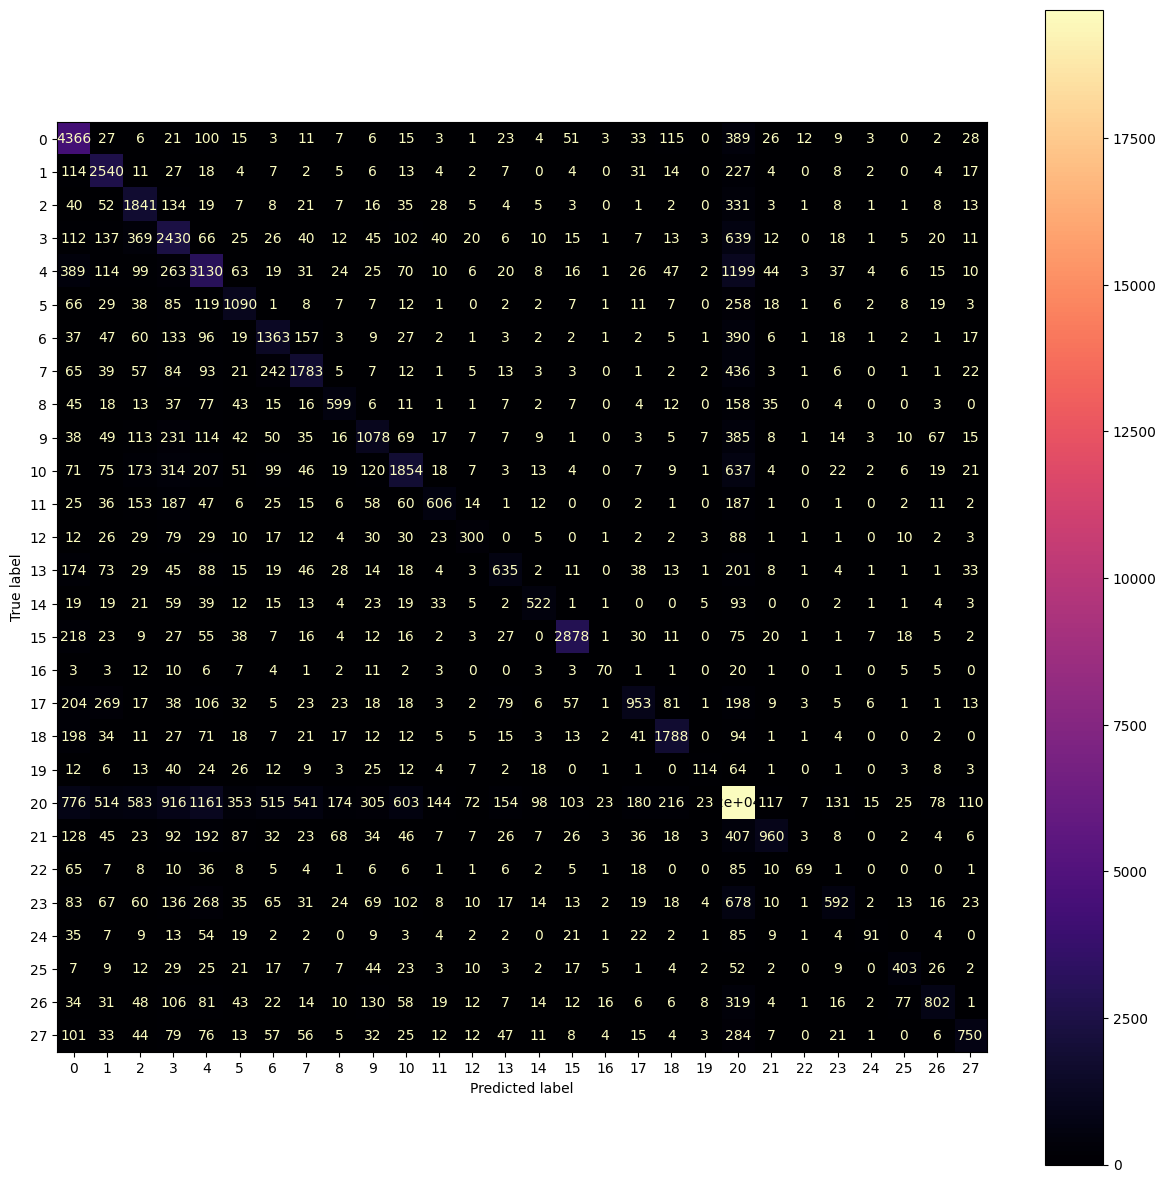

In [41]:
y_emo_predict = clf1.predict(X_test)

print(f"Score for Emotion: {clf1.score(X_test, yemo_test)}")
metrics(yemo_test, y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test, y_pred=y_emo_predict))
fig, ax = plt.subplots(figsize=(15, 15))
cmp.plot(ax=ax, cmap='magma')

Score for Sentiment: 0.7381096496333373
Accuracy: 0.7381096496333373
Precision (Weighted): 0.7456018399744906
F1 Score (Weighted): 0.7398838078520718
F1 Score (Macro): 0.7235809533353277
              precision    recall  f1-score   support

           0       0.60      0.71      0.65      9400
           1       0.70      0.78      0.74     19293
           2       0.73      0.70      0.71     27627
           3       0.84      0.76      0.80     29590

    accuracy                           0.74     85910
   macro avg       0.72      0.74      0.72     85910
weighted avg       0.75      0.74      0.74     85910



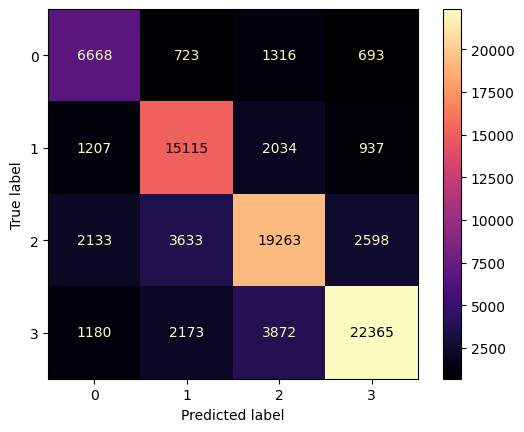

In [42]:
y_sent_predict = clf2.predict(X_test)

print(f"Score for Sentiment: {clf2.score(X_test, ysent_test)}")
metrics(ysent_test, y_sent_predict)
ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')

<h2>Multi-Layered Perceptron (neural network.MLPClassifier) using new test train split</h2>

<b>Did not converge timed out</b>

In [43]:
classifier = MLPClassifier()
skip=False
if(not skip):
    if (os.path.exists('models/new_split/MLP1_model_new_split.pickle')):
        pickle_in = open('models/new_split/MLP1_model_new_split.pickle', 'rb')
        clf1 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        MLP1 = classifier.fit(X_train, yemo_train)
        with open('models/new_split/MLP1_model_new_split.pickle', 'wb') as f:
            pickle.dump(classifier, f)
        pickle_in = open('models/new_split/MLP1_model_new_split.pickle', 'rb')
        clf1 = pickle.load(pickle_in)

    if (os.path.exists('models/new_split/MLP2_model_new_split.pickle')):
        pickle_in = open('models/new_split/MLP2_model_new_split.pickle', 'rb')
        clf2 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        MLP2 = classifier.fit(X_train, ysent_train)
        with open('models/new_split/MLP2_model_new_split.pickle', 'wb') as f:
            pickle.dump(classifier, f)
        pickle_in = open('models/new_split/MLP2_model_new_split.pickle', 'rb')
        clf2 = pickle.load(pickle_in)
else:
    print("skipped")

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


pickle file used
pickle file used


Score for Emotion: 0.597264579210802
Accuracy: 0.597264579210802
Precision (Weighted): 0.589451613416094
F1 Score (Weighted): 0.589102118693317
F1 Score (Macro): 0.5247150664616849
              precision    recall  f1-score   support

           0       0.64      0.72      0.68      5279
           1       0.65      0.69      0.67      3071
           2       0.59      0.46      0.51      2594
           3       0.49      0.40      0.44      4185
           4       0.54      0.38      0.45      5681
           5       0.53      0.49      0.51      1808
           6       0.56      0.41      0.47      2406
           7       0.57      0.56      0.57      2908
           8       0.49      0.56      0.52      1114
           9       0.50      0.36      0.42      2394
          10       0.52      0.47      0.49      3802
          11       0.51      0.46      0.48      1458
          12       0.43      0.54      0.48       720
          13       0.48      0.42      0.45      1506
        

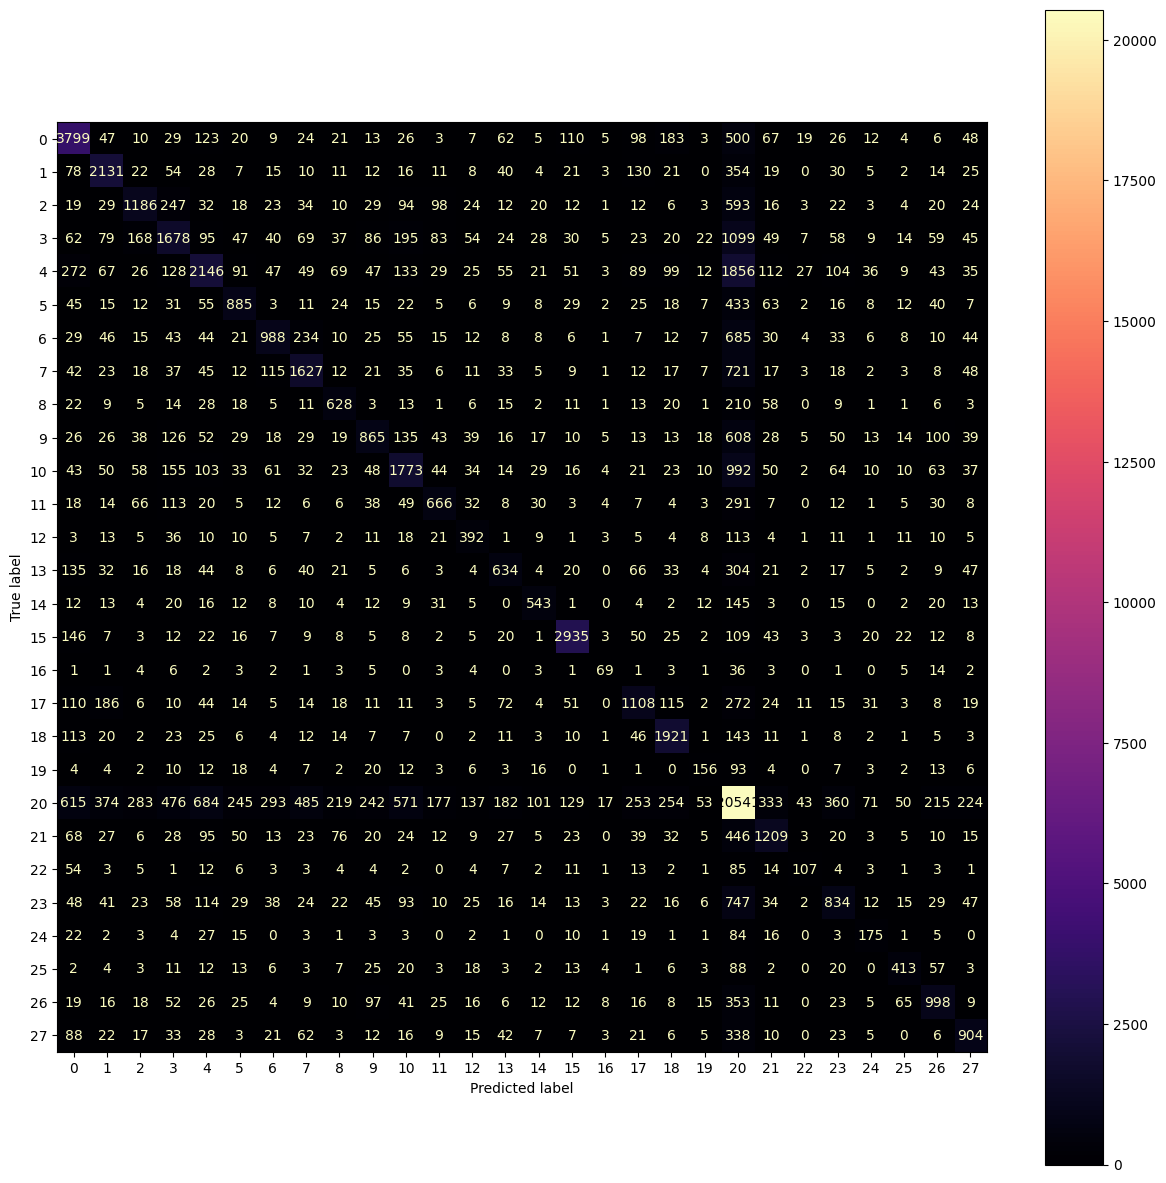

In [44]:

if (os.path.exists('models/new_split/MLP1_model_new_split.pickle') and not skip):
    y_emo_predict = clf1.predict(X_test)
    print(f"Score for Emotion: {clf1.score(X_test, yemo_test)}")
    metrics(yemo_test, y_emo_predict)
    cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test, y_pred=y_emo_predict))
    fig, ax = plt.subplots(figsize=(15, 15))
    cmp.plot(ax=ax, cmap='magma')
else:
    print("skipped")

Score for Sentiment: 0.724083343033407
Accuracy: 0.724083343033407
Precision (Weighted): 0.7231308747075315
F1 Score (Weighted): 0.7234056605932663
F1 Score (Macro): 0.7026253824439093
              precision    recall  f1-score   support

           0       0.64      0.58      0.61      9400
           1       0.71      0.73      0.72     19293
           2       0.70      0.70      0.70     27627
           3       0.79      0.79      0.79     29590

    accuracy                           0.72     85910
   macro avg       0.71      0.70      0.70     85910
weighted avg       0.72      0.72      0.72     85910



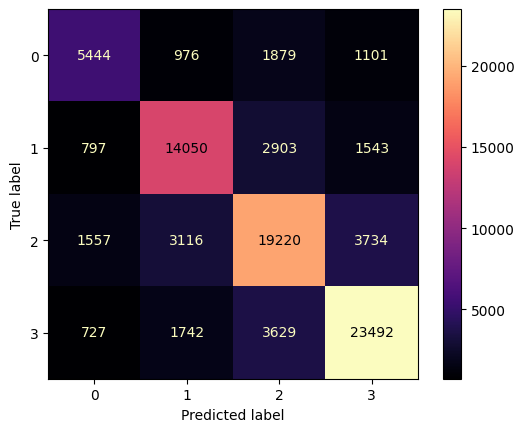

In [45]:
if (os.path.exists('models/new_split/MLP1_model_new_split.pickle') and not skip):
    y_sent_predict = clf2.predict(X_test)

    print(f"Score for Sentiment: {clf2.score(X_test, ysent_test)}")
    metrics(ysent_test, y_sent_predict)
    ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')
else:
    print("skipped")

<h2>Multinomial Naive Bayes Classifier found using GridSearchCV and new test train split</h2>

input parameter requires a model object

using the following alpha parameters 0.5,0,0.36,1

In [46]:
parameters = {"alpha": (0.5, 0, 0.36, 1)}
clfMNB = MultinomialNB()

classifier = GridSearchCV(estimator=clfMNB, param_grid=parameters, n_jobs=-1)

if (os.path.exists('models/new_split/MNB1GridCV_model_new_split.pickle')):
    pickle_in = open('models/new_split/MNB1GridCV_model_new_split.pickle', 'rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, yemo_train)
    with open('models/new_split/MNB1GridCV_model_new_split.pickle', 'wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/new_split/MNB1GridCV_model_new_split.pickle', 'rb')
    clf1 = pickle.load(pickle_in)

if (os.path.exists('models/new_split/MNB2GridCV_model_new_split.pickle')):
    pickle_in = open('models/new_split/MNB2GridCV_model_new_split.pickle', 'rb')
    clf2 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, ysent_train)
    with open('models/new_split/MNB2GridCV_model_new_split.pickle', 'wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/new_split/MNB2GridCV_model_new_split.pickle', 'rb')
    clf2 = pickle.load(pickle_in)


pickle file used
pickle file used


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator MultinomialNB from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


Best estimator (Emotion): MultinomialNB(alpha=0.5), Best Score: 0.3905984755012737
Accuracy: 0.48319171225701313
Precision (Weighted): 0.48622080357730924
F1 Score (Weighted): 0.4530953587819125
F1 Score (Macro): 0.34524867600976045
              precision    recall  f1-score   support

           0       0.53      0.60      0.57      5279
           1       0.59      0.59      0.59      3071
           2       0.49      0.34      0.40      2594
           3       0.40      0.24      0.30      4185
           4       0.43      0.24      0.31      5681
           5       0.40      0.30      0.34      1808
           6       0.47      0.25      0.33      2406
           7       0.49      0.30      0.38      2908
           8       0.56      0.22      0.31      1114
           9       0.46      0.19      0.27      2394
          10       0.42      0.27      0.33      3802
          11       0.54      0.26      0.35      1458
          12       0.62      0.14      0.23       720
          

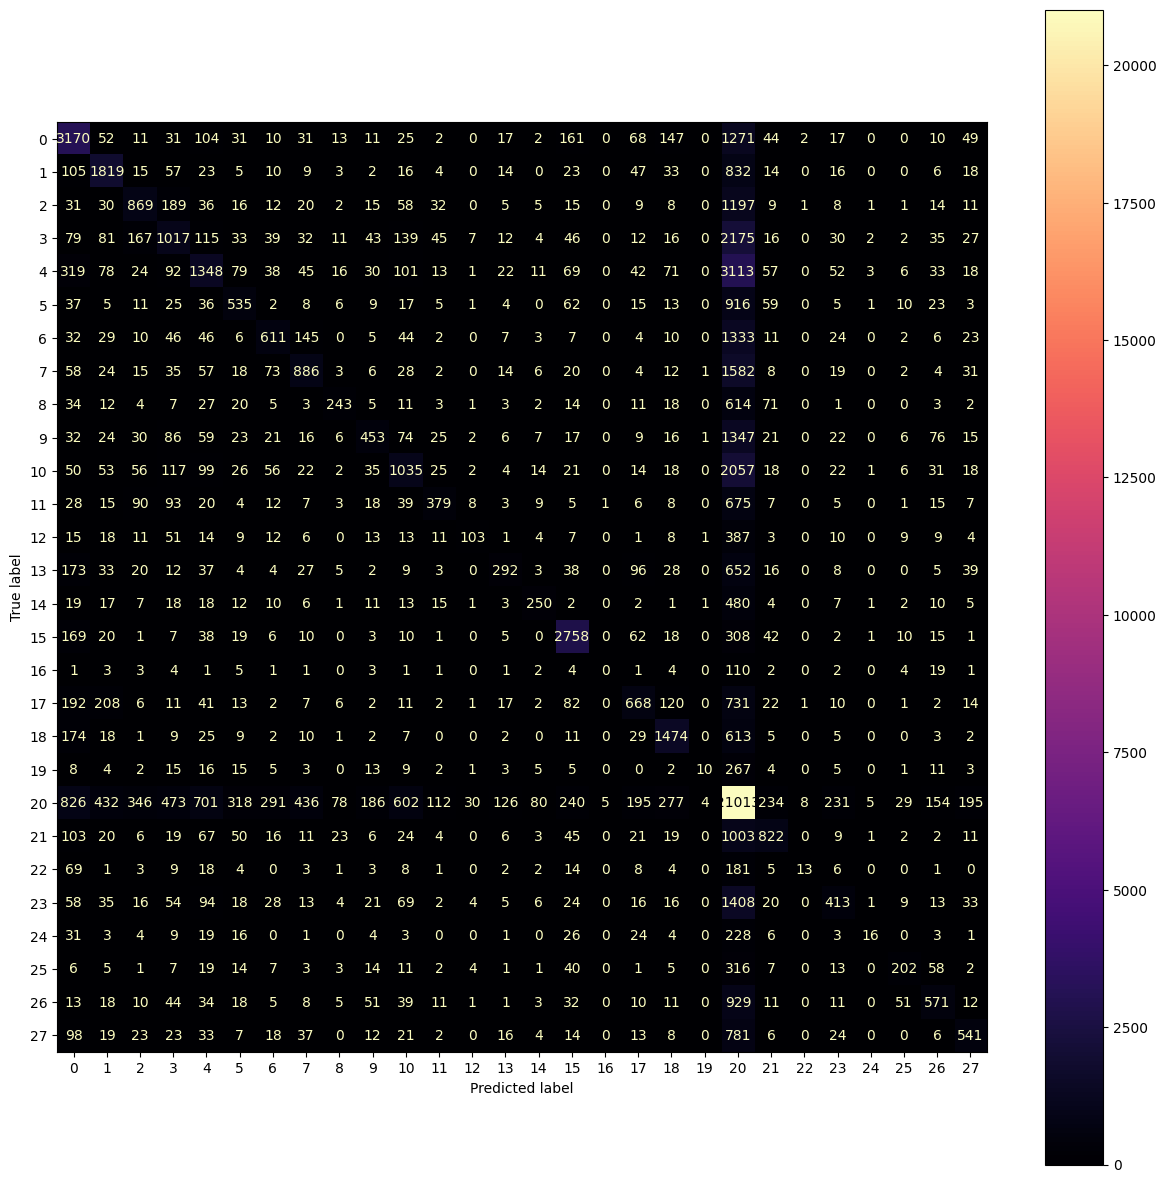

In [47]:
y_emo_predict = clf1.best_estimator_.predict(X_test)

print(f"Best estimator (Emotion): {clf1.best_estimator_}, Best Score: {clf1.best_score_}")
metrics(yemo_test, y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test, y_pred=y_emo_predict))
fig, ax = plt.subplots(figsize=(15, 15))
cmp.plot(ax=ax, cmap='magma')


Best estimator (Sentiment): MultinomialNB(alpha=1), Best Score: 0.543696292227927
Accuracy: 0.6142823885461529
Precision (Weighted): 0.6092429353223557
F1 Score (Weighted): 0.6086266927656451
F1 Score (Macro): 0.5764617295966536
              precision    recall  f1-score   support

           0       0.54      0.35      0.42      9400
           1       0.61      0.61      0.61     19293
           2       0.57      0.57      0.57     27627
           3       0.67      0.75      0.70     29590

    accuracy                           0.61     85910
   macro avg       0.60      0.57      0.58     85910
weighted avg       0.61      0.61      0.61     85910



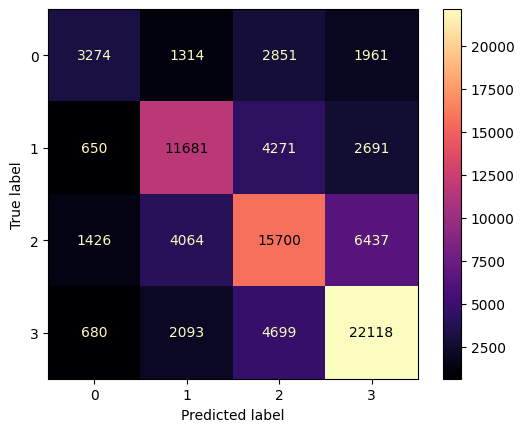

In [48]:
y_sent_predict = clf2.best_estimator_.predict(X_test)

print(f"Best estimator (Sentiment): {clf2.best_estimator_}, Best Score: {clf2.best_score_}")
metrics(ysent_test, y_sent_predict)
ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')

<h2>DecisionTree Classifier found using GridSearchCV and new test train split </h2>

input parameter requires a model object

using the various value for the following parameters: criterion, max_depth, min_samples

In [49]:
parameters = {"criterion": ("gini", "entropy"), "max_depth": (100, 3), "min_samples_split": (12, 5, 30)}
clfDT = DecisionTreeClassifier()

classifier = GridSearchCV(estimator=clfDT, param_grid=parameters, n_jobs=-1)

if (os.path.exists('models/new_split/DT1GridCV_model_new_split.pickle')):
    pickle_in = open('models/new_split/DT1GridCV_model_new_split.pickle', 'rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, yemo_train)
    with open('models/new_split/DT1GridCV_model_new_split.pickle', 'wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/new_split/DT1GridCV_model_new_split.pickle', 'rb')
    clf1 = pickle.load(pickle_in)

if (os.path.exists('models/new_split/DT2GridCV_model_new_split.pickle')):
    pickle_in = open('models/new_split/DT2GridCV_model_new_split.pickle', 'rb')
    clf2 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, ysent_train)
    with open('models/new_split/DT2GridCV_model_new_split.pickle', 'wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/new_split/DT2GridCV_model_new_split.pickle', 'rb')
    clf2 = pickle.load(pickle_in)


pickle file used
pickle file used


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


Best estimator (Emotion): DecisionTreeClassifier(max_depth=100, min_samples_split=30), Best Score: 0.3984285880572692
Accuracy: 0.46887440344546616
Precision (Weighted): 0.46001183892106967
F1 Score (Weighted): 0.4234466570556395
F1 Score (Macro): 0.32038816047382707
              precision    recall  f1-score   support

           0       0.54      0.51      0.53      5279
           1       0.57      0.59      0.58      3071
           2       0.43      0.26      0.33      2594
           3       0.30      0.16      0.21      4185
           4       0.36      0.15      0.21      5681
           5       0.38      0.17      0.23      1808
           6       0.41      0.20      0.27      2406
           7       0.46      0.21      0.29      2908
           8       0.46      0.27      0.34      1114
           9       0.37      0.15      0.21      2394
          10       0.32      0.15      0.20      3802
          11       0.42      0.20      0.27      1458
          12       0.48      

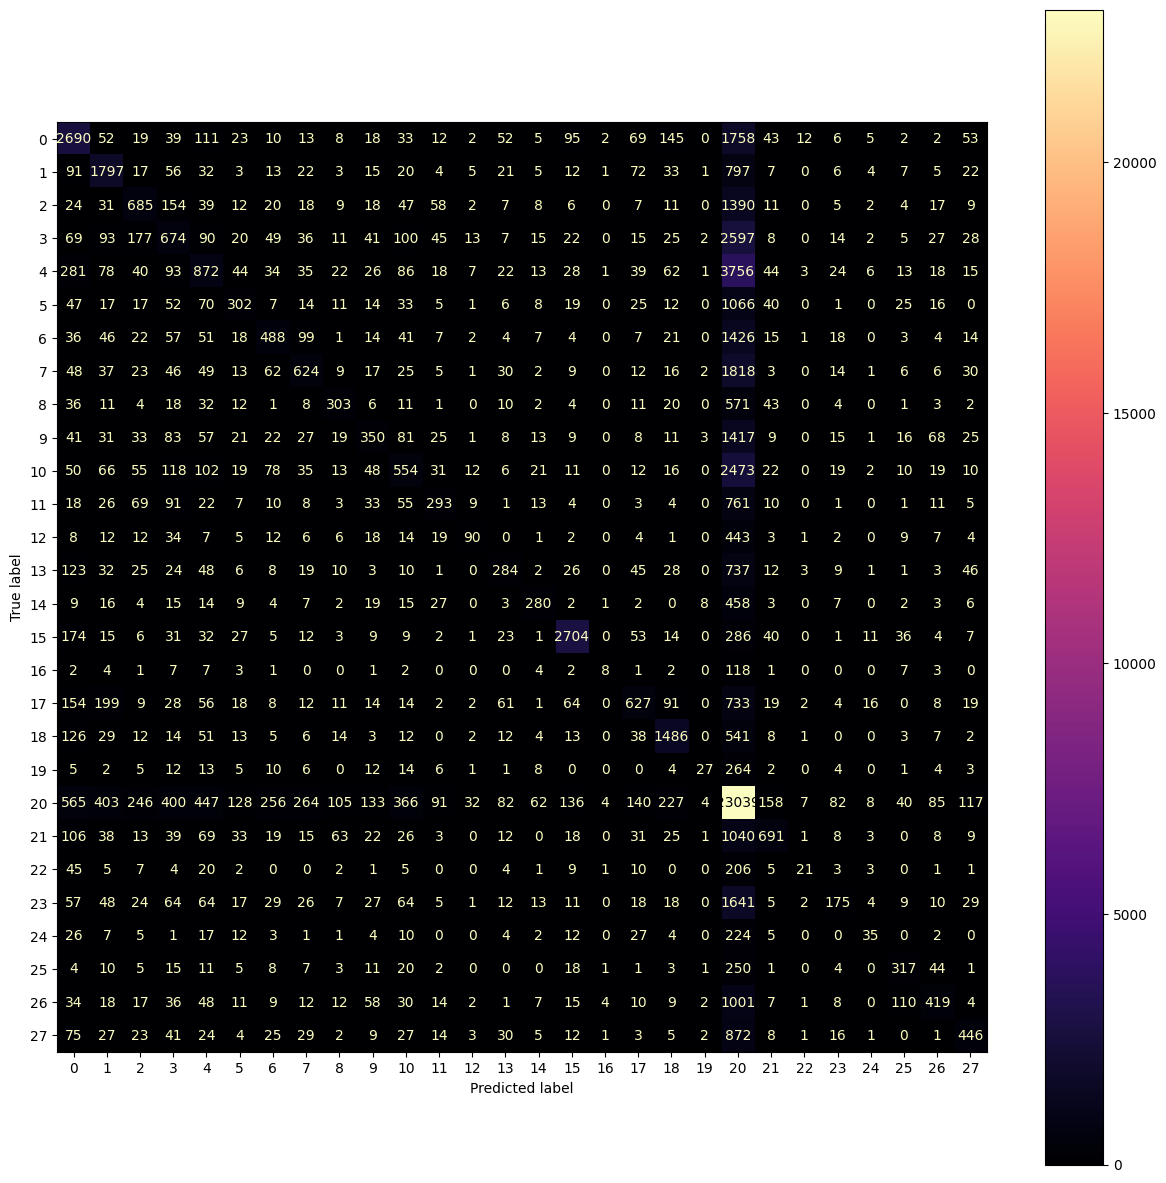

In [50]:
y_emo_predict = clf1.best_estimator_.predict(X_test)

print(f"Best estimator (Emotion): {clf1.best_estimator_}, Best Score: {clf1.best_score_}")
metrics(yemo_test, y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test, y_pred=y_emo_predict))
fig, ax = plt.subplots(figsize=(15, 15))
cmp.plot(ax=ax, cmap='magma')


Best estimator (Sentiment): DecisionTreeClassifier(max_depth=100, min_samples_split=5), Best Score: 0.49976719823070653
Accuracy: 0.5834245140263066
Precision (Weighted): 0.6295374165017311
F1 Score (Weighted): 0.5815988378951181
F1 Score (Macro): 0.5479237134021753
              precision    recall  f1-score   support

           0       0.51      0.34      0.41      9400
           1       0.65      0.45      0.53     19293
           2       0.47      0.78      0.59     27627
           3       0.80      0.57      0.66     29590

    accuracy                           0.58     85910
   macro avg       0.61      0.53      0.55     85910
weighted avg       0.63      0.58      0.58     85910



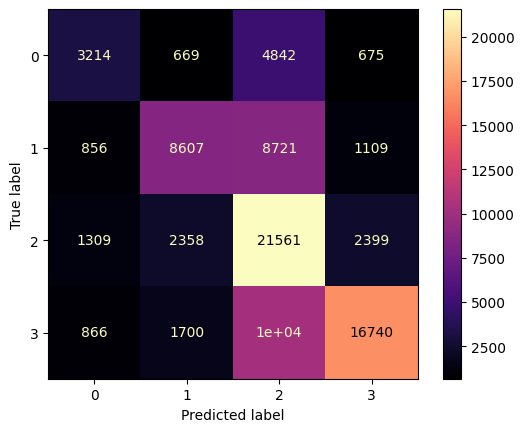

In [51]:
y_sent_predict = clf2.best_estimator_.predict(X_test)

print(f"Best estimator (Sentiment): {clf2.best_estimator_}, Best Score: {clf2.best_score_}")
metrics(ysent_test, y_sent_predict)
ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')

<h2>Multi-Layered Perceptron found using GridSearchCV and new test train split</h2>

input parameter requires a model object

using the various value for the following parameters: activation, architectures, solvers
Hidden layers <a href="https://datascience.stackexchange.com/questions/19768/how-to-implement-pythons-mlpclassifier-with-gridsearchcv">Link</a>

<b>Unable to converge</b>


In [52]:
parameters = {"activation":("identity", "logistic", "tanh", "relu"),"hidden_layer_sizes":((5,5),(5,10)), "solver":("adam","sgd")}
#currently 5 neurons then 5 neurons and 5 neurons then 10 neurons in the hidden layer
clfMLP = MLPClassifier(early_stopping=True,verbose=True, max_iter=5)
classifier = GridSearchCV(estimator=clfMLP, param_grid=parameters, n_jobs=-1)
skip=False
if(not skip):
    if (os.path.exists('models/new_split/MLP1GridCV_model_new_split.pickle')):
        pickle_in = open('models/new_split/MLP1GridCV_model_new_split.pickle','rb')
        clf1 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        classifier = classifier.fit(X_train, yemo_train)
        with open('models/new_split/MLP1GridCV_model_new_split.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/new_split/MLP1GridCV_model_new_split.pickle','rb')
        clf1 = pickle.load(pickle_in)

    if (os.path.exists('models/new_split/MLP2GridCV_model_new_split.pickle')):
        pickle_in = open('models/new_split/MLP2GridCV_model_new_split.pickle','rb')
        clf2 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        classifier = classifier.fit(X_train,ysent_train)
        with open('models/new_split/MLP2GridCV_model_new_split.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/new_split/MLP2GridCV_model_new_split.pickle','rb')
        clf2 = pickle.load(pickle_in)
else:
    print("skipped")

pickle file used
pickle file used


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.1.2 wh

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.4336165754859737
Precision (Weighted): 0.37461576706134275
F1 Score (Weighted): 0.3410924451147999
F1 Score (Macro): 0.20124643034510895


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           0       0.46      0.54      0.50      5279
           1       0.55      0.60      0.57      3071
           2       0.40      0.09      0.15      2594
           3       0.24      0.02      0.03      4185
           4       0.39      0.05      0.10      5681
           5       0.24      0.05      0.08      1808
           6       0.34      0.09      0.15      2406
           7       0.27      0.13      0.18      2908
           8       0.45      0.14      0.22      1114
           9       0.00      0.00      0.00      2394
          10       0.27      0.02      0.03      3802
          11       0.56      0.10      0.17      1458
          12       0.00      0.00      0.00       720
          13       0.34      0.02      0.03      1506
          14       0.00      0.00      0.00       916
          15       0.79      0.78      0.79      3506
          16       0.00      0.00      0.00       174
          17       0.33    

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           0       0.46      0.54      0.50      5279
           1       0.55      0.60      0.57      3071
           2       0.40      0.09      0.15      2594
           3       0.24      0.02      0.03      4185
           4       0.39      0.05      0.10      5681
           5       0.24      0.05      0.08      1808
           6       0.34      0.09      0.15      2406
           7       0.27      0.13      0.18      2908
           8       0.45      0.14      0.22      1114
           9       0.00      0.00      0.00      2394
          10       0.27      0.02      0.03      3802
          11       0.56      0.10      0.17      1458
          12       0.00      0.00      0.00       720
          13       0.34      0.02      0.03      1506
          14       0.00      0.00      0.00       916
          15       0.79      0.78      0.79      3506
          16       0.00      0.00      0.00       174
          17       0.33    

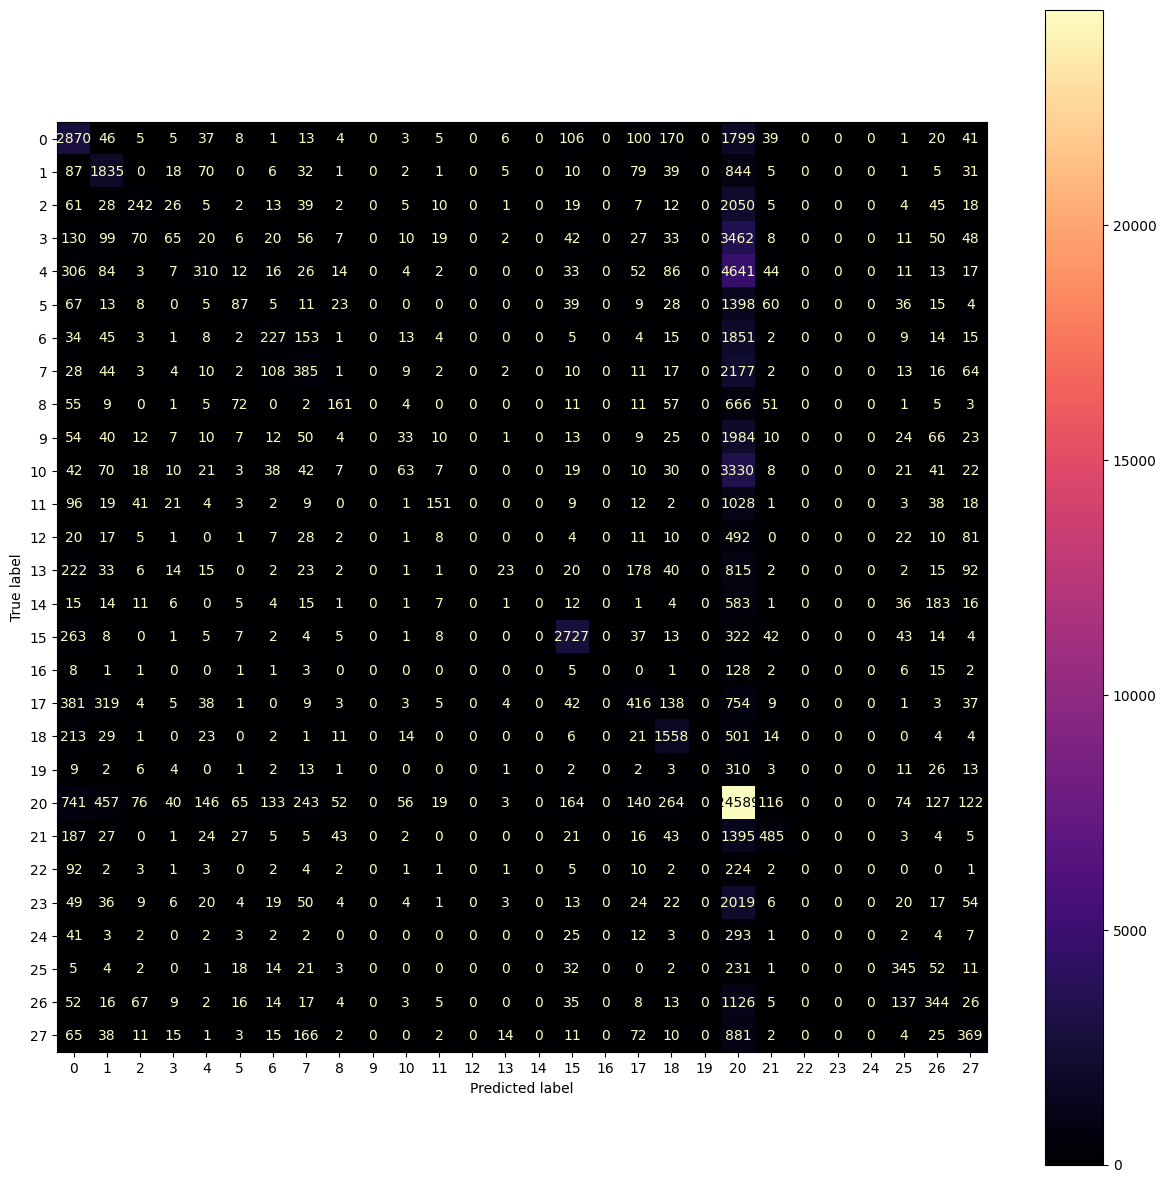

In [53]:
if (os.path.exists('models/new_split/MLP1GridCV_model_new_split.pickle') and not skip):
    y_emo_predict = clf1.best_estimator_.predict(X_test)
    metrics(yemo_test,y_emo_predict)
    print(f"Best estimator (Emotion): {clf1.best_estimator_}, Best Score: {clf1.best_score_}")
    metrics(yemo_test,y_emo_predict)
    cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test,y_pred= y_emo_predict))
    fig, ax = plt.subplots(figsize=(15,15))
    cmp.plot(ax=ax,cmap='magma')
else:
    print("skipped")

Accuracy: 0.6020137353043883
Precision (Weighted): 0.6021584047283822
F1 Score (Weighted): 0.5985584258004835
F1 Score (Macro): 0.5611265032909138
              precision    recall  f1-score   support

           0       0.51      0.32      0.39      9400
           1       0.59      0.57      0.58     19293
           2       0.53      0.61      0.57     27627
           3       0.71      0.70      0.71     29590

    accuracy                           0.60     85910
   macro avg       0.58      0.55      0.56     85910
weighted avg       0.60      0.60      0.60     85910

Best estimator (Sentiment): MLPClassifier(activation='tanh', early_stopping=True, hidden_layer_sizes=(5, 5),
              max_iter=5, verbose=True), Best Score: 0.5505296240251426


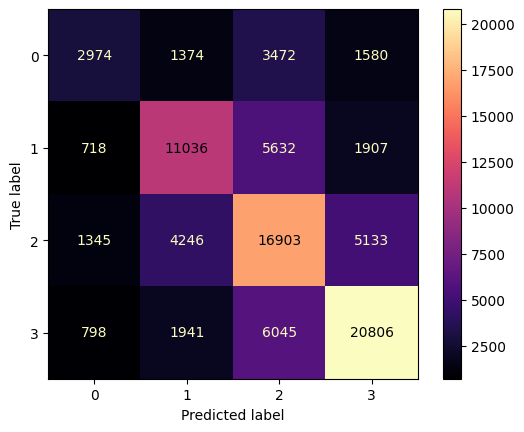

In [54]:
if (os.path.exists('models/new_split/MLP2GridCV_model_new_split.pickle') and not skip):
    y_sent_predict = clf2.best_estimator_.predict(X_test)
    metrics(ysent_test,y_sent_predict)
    print(f"Best estimator (Sentiment): {clf2.best_estimator_}, Best Score: {clf2.best_score_}")
    ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')
else:
    print("skipped")

<h3>3. Embedding as features</h3>

requires install of library gensim

pip install gensim

https://radimrehurek.com/gensim/models/word2vec.html


<h2> 3.1 Load Word2Vec </h2>

In [55]:
# result.most_similar("cat")

In [56]:
if (os.path.exists('models/word2vec.pickle')):
    pickle_in = open('models/word2vec.pickle','rb')
    word2vec = pickle.load(pickle_in)
    print("pickle file used")
else:
    model =gensim.downloader.load("word2vec-google-news-300")
    with open('models/word2vec.pickle','wb') as f:
        pickle.dump(model, f)

    pickle_in = open('models/word2vec.pickle','rb')
    word2vec = pickle.load(pickle_in)

pickle file used


In [57]:
nltk.download('punkt')
#post.str.lower()
tokenized_word = [word_tokenize(i) for i in post]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\girou\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<h2> 3.2 Tokenize and Display Token Count </h2>

In [58]:
post_tokens = [post_tokens for post_tokens in tokenized_word] #http://librarycarpentry.org/lc-tdm/aio/index.html
print("Number of tokens in Reddit posts:")
tokens_list = []
for i in post_tokens:
    for j in i:
        tokens_list.append(j)
print(len(tokens_list))

Number of tokens in Reddit posts:
2642128


<h2> 3.3 Average Embeddings For Posts and 3.4 Hit Rates </h2>

In [59]:
X_train_emb,X_test_emb, y_emo_train, y_emo_test, y_sent_train, y_sent_test= train_test_split(post_tokens, encodedEmo, encodedSentiment, test_size = 0.2, train_size=0.8)

In [60]:
model = gensim.downloader.load("word2vec-google-news-300")

post_tokens_training = []
found = 0
total=0
# Cleaning Google model
for post in X_train_emb:
    clean_post = [] 
    for word in post:
        if word in model:
            clean_post.append(word)
            found = found+1
            total = total+1
        else:
            total = total+1
    post_tokens_training.append(clean_post)


# Average embed calculation
average_embeds_train = []
for post in post_tokens_training:
    token_embeddings = []
    for word in post:
        token_embeddings.append(model[word]) 

    average_embeds_train.append(np.mean(token_embeddings,axis=0)) 



posts_tokens_in_model_test = [] 
found2=0
total2=0
# Cleaning Google model
for post in X_test_emb:
    clean_test = [] 
    for word in post:
        if word in model:
            clean_test.append(word)
            found2=found2+1
            total2=total2+1
        else:
            total2=total2+1
    posts_tokens_in_model_test.append(clean_test)

    
# Average embed calculation
average_embeds_test = []
for post in posts_tokens_in_model_test:
    token_embeddings = []
    for word in post:
        token_embeddings.append(model[word]) 
    average_embeds_test.append(np.mean(token_embeddings,axis=0)) 


X_embed_avg_train = average_embeds_train
X_embed_avg_test = average_embeds_test
print(f"Shape of training set: {np.shape(X_embed_avg_train)}")
print(f"Shape of test set: {np.shape(X_embed_avg_test)}")
print("Training Hit Rate")
print(found/total)
print("Testing Hit Rate")
print(found2/total2)

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Shape of training set: (137456,)
Shape of test set: (34364,)
Training Hit Rate
0.7744088934887228
Testing Hit Rate
0.7748966938235974


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


<h2> Cleaning Data </h2>

In [61]:
#Cleaning training and test sets
# RUN TWICE
for i in range(2):
    print(f"Shape of test set: {np.shape(X_embed_avg_test)}")
    print(np.shape(y_emo_test))

    # Remove empty posts
    for i in range(len(X_embed_avg_train)):
        if i >= len(X_embed_avg_train):
            break
        if X_embed_avg_train[i].shape == (300,):
            continue
        else:
            X_embed_avg_train.pop(i)
            y_emo_train = np.delete(y_emo_train, i)
            y_sent_train = np.delete(y_sent_train, i)

    # Remove empty posts
    for i in range(len(X_embed_avg_test)):
        if i >= len(X_embed_avg_test):
            break
        if X_embed_avg_test[i].shape == (300,):
            continue
        else:
            X_embed_avg_test.pop(i)
            y_emo_test = np.delete(y_emo_test, i)
            y_sent_test = np.delete(y_sent_test, i)


    print(f"Shape of training set: {np.shape(X_embed_avg_train)}")
    print(f"Shape of test set: {np.shape(X_embed_avg_test)}")
    print(np.shape(y_emo_test))

    # Convert into np array
    for i in range(len(X_embed_avg_train)):
        X_embed_avg_train[i] = np.array(X_embed_avg_train[i])

    for i in range(len(X_embed_avg_test)):
        X_embed_avg_test[i] = np.array(X_embed_avg_test[i])

Shape of test set: (34364,)
(34364,)
Shape of training set: (137392, 300)
Shape of test set: (34341, 300)
(34341,)
Shape of test set: (34341, 300)
(34341,)
Shape of training set: (137392, 300)
Shape of test set: (34341, 300)
(34341,)


<h2> 3.5 Base-MLP</h2>

In [62]:
# classifier = MLPClassifier()
classifier = MLPClassifier(max_iter=100)

if (os.path.exists('models/Embeddings_MLP_model.pickle')):
    pickle_in = open('models/Embeddings_MLP_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print('pickle file used')
else:
    EMLP = classifier.fit(X_embed_avg_train, y_emo_train)
    with open('models/Embeddings_MLP_model.pickle','wb') as f:
            pickle.dump(EMLP, f)
    pickle_in = open('models/Embeddings_MLP_model.pickle','rb')
    clf1 = pickle.load(pickle_in)

        
if (os.path.exists('models/Embeddings_MLP_model2.pickle')):
    pickle_in = open('models/Embeddings_MLP_model2.pickle','rb')
    clf2 = pickle.load(pickle_in)
    print('pickle file used')
else:
    EMLP2 = classifier.fit(X_embed_avg_train, y_sent_train)
    with open('models/Embeddings_MLP_model2.pickle','wb') as f:
            pickle.dump(EMLP2, f)
    pickle_in = open('models/Embeddings_MLP_model2.pickle','rb')
    clf2 = pickle.load(pickle_in)


pickle file used
pickle file used


In [63]:
print(np.shape(X_embed_avg_train))
print(np.shape(y_emo_train))

(137392, 300)
(137392,)


Score for Emotion: 0.39920211991497045
Accuracy: 0.39920211991497045
Precision (Weighted): 0.370470965614331
F1 Score (Weighted): 0.3035200621897033
F1 Score (Macro): 0.17070829634460502
              precision    recall  f1-score   support

           0       0.48      0.40      0.43      2032
           1       0.47      0.37      0.42      1245
           2       0.36      0.18      0.24      1062
           3       0.24      0.02      0.04      1675
           4       0.34      0.02      0.04      2265
           5       0.35      0.04      0.08       717
           6       0.45      0.01      0.02      1046
           7       0.40      0.09      0.15      1216
           8       0.56      0.08      0.14       437
           9       0.22      0.01      0.02       922
          10       0.26      0.04      0.07      1546
          11       0.41      0.09      0.15       568
          12       0.00      0.00      0.00       285
          13       0.44      0.04      0.07       596
  

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_s

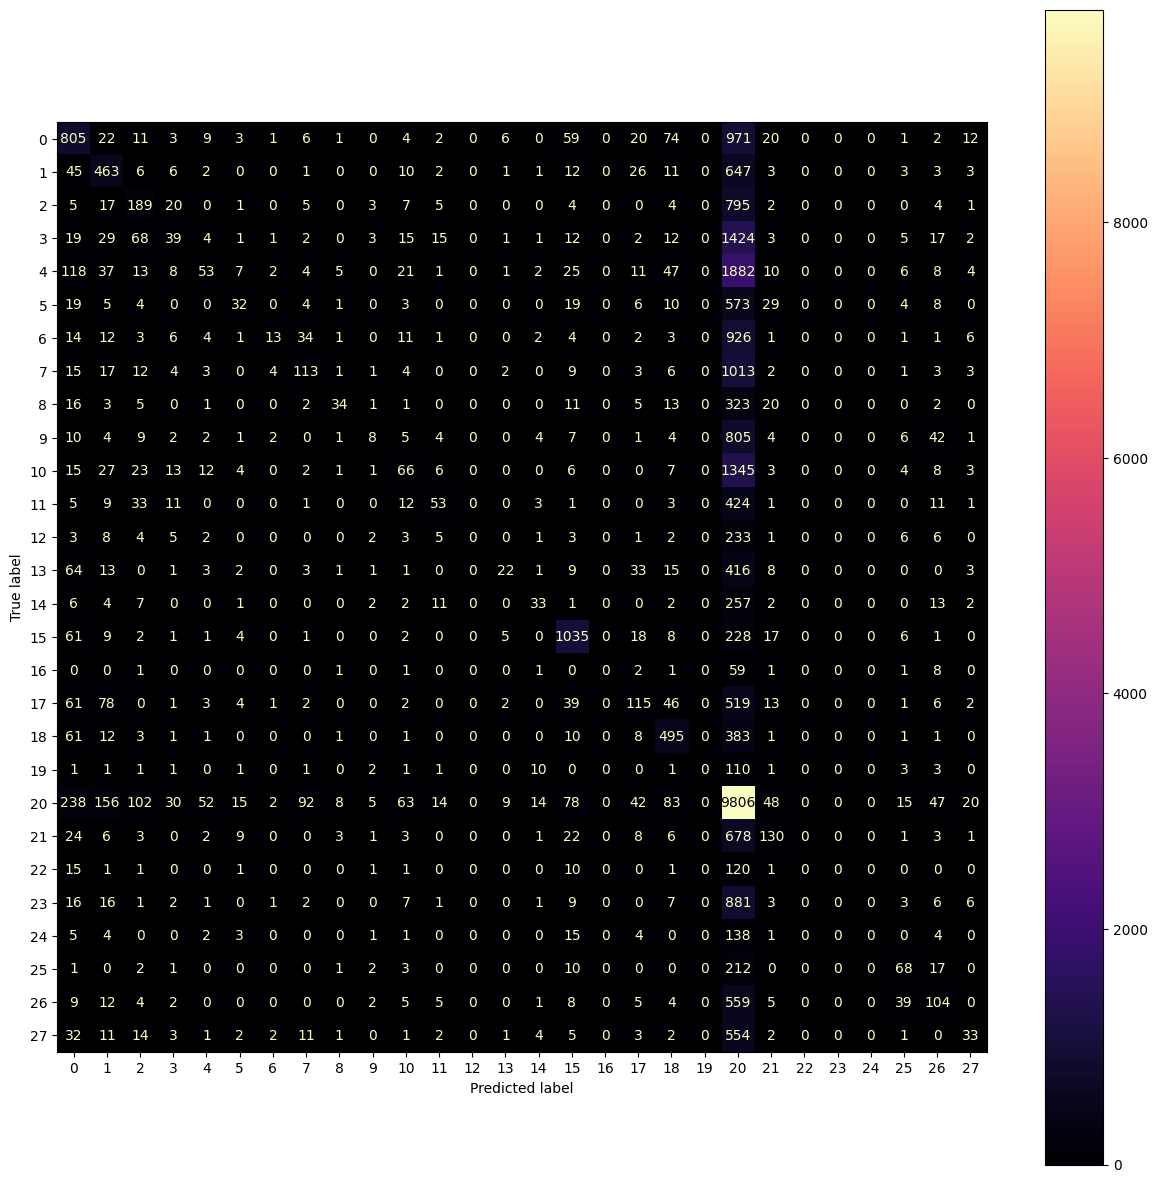

In [64]:
y_emo_predict = clf1.predict(X_embed_avg_test)
print(f"Score for Emotion: {clf1.score(X_embed_avg_test, y_emo_test)}")
metrics(y_emo_test, y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=y_emo_test, y_pred=y_emo_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax, cmap='magma')

Score for Sentiments: 0.5333566291022394
Accuracy: 0.5333566291022394
Precision (Weighted): 0.5349674993634975
F1 Score (Weighted): 0.5180649875454775
F1 Score (Macro): 0.46349651772944567
              precision    recall  f1-score   support

           0       0.51      0.13      0.21      3910
           1       0.52      0.44      0.48      7696
           2       0.46      0.59      0.52     10939
           3       0.62      0.67      0.65     11796

    accuracy                           0.53     34341
   macro avg       0.53      0.46      0.46     34341
weighted avg       0.53      0.53      0.52     34341



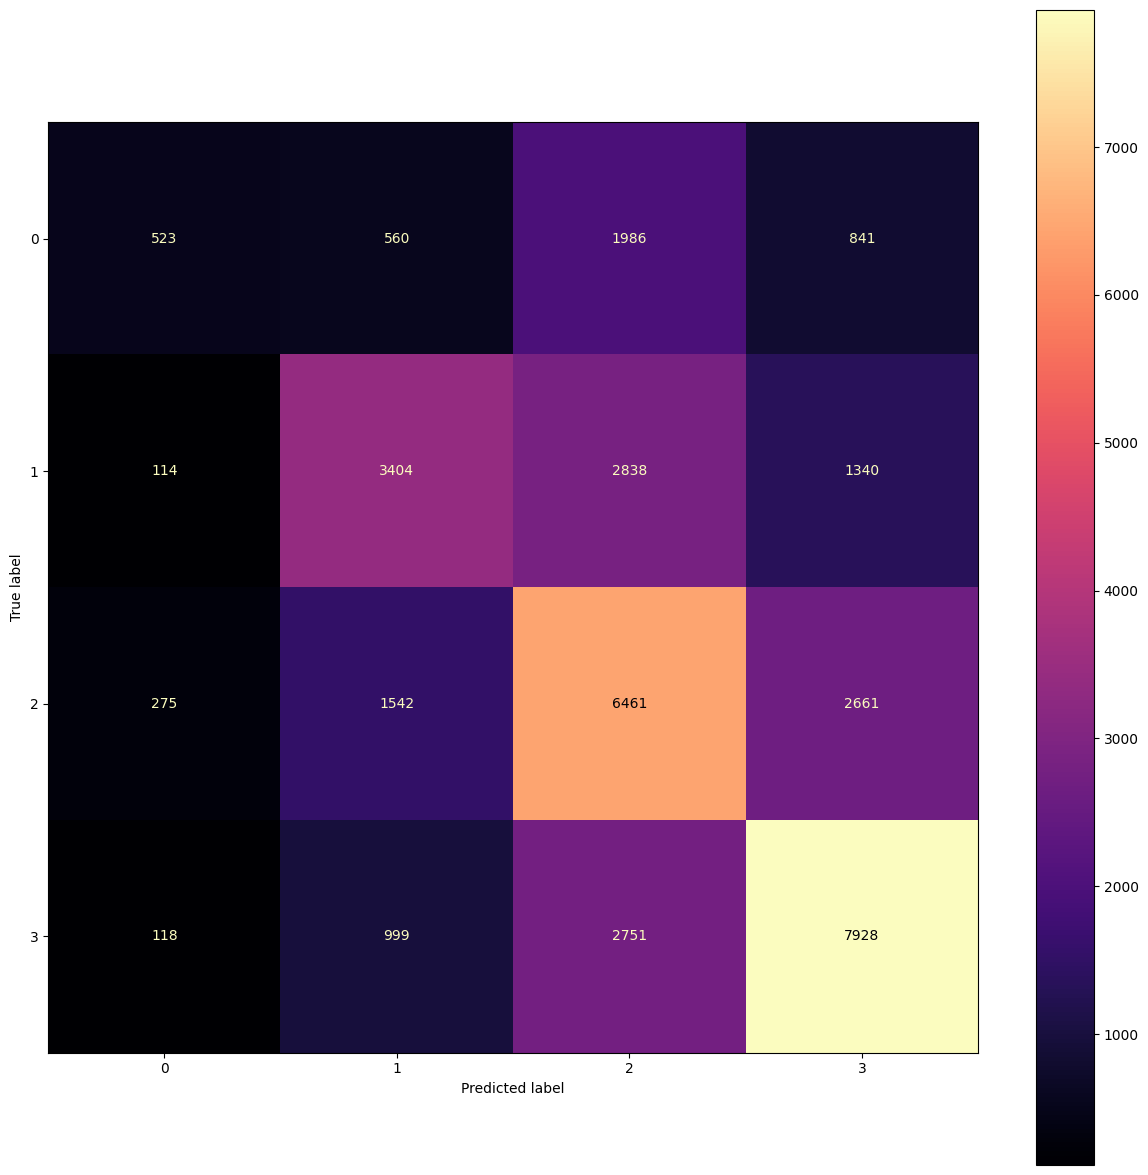

In [65]:
y_sent_predict = clf2.predict(X_embed_avg_test)
print(f"Score for Sentiments: {clf2.score(X_embed_avg_test, y_sent_test)}")
metrics(y_sent_test, y_sent_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=y_sent_test, y_pred=y_sent_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax, cmap='magma')

In [66]:
print(np.shape(X_embed_avg_train))

(137392, 300)


<h2> 3.6 Top-MLP </h2>

In [67]:
parameters = {"activation":("identity", "logistic", "tanh", "relu"),"hidden_layer_sizes":((5,5),(5,10)), "solver":("adam","sgd")}
#currently 5 neurons then 5 neurons and 5 neurons then 10 neurons in the hidden layer
clfMLP = MLPClassifier(early_stopping=True,verbose=True, max_iter=100)
classifier = GridSearchCV(estimator=clfMLP, param_grid=parameters, n_jobs=-1)
skip=False
if(not skip):
    if (os.path.exists('models/new_split/MLP1GridCV_model_emb.pickle')):
        pickle_in = open('models/new_split/MLP1GridCV_model_emb.pickle','rb')
        clf1 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        X_embed_avg_train, y_emo_train
        classifier = classifier.fit(X_embed_avg_train, y_emo_train)
        with open('models/new_split/MLP1GridCV_model_emb.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/new_split/MLP1GridCV_model_emb.pickle','rb')
        clf1 = pickle.load(pickle_in)

    if (os.path.exists('models/new_split/MLP2GridCV_model_emb.pickle')):
        pickle_in = open('models/new_split/MLP2GridCV_model_emb.pickle','rb')
        clf2 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        classifier = classifier.fit(X_embed_avg_train,y_sent_train)
        with open('models/new_split/MLP2GridCV_model_emb.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/new_split/MLP2GridCV_model_emb.pickle','rb')
        clf2 = pickle.load(pickle_in)
else:
    print("skipped")

pickle file used
pickle file used


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.1.2 wh

Accuracy: 0.38143909612416643
Precision (Weighted): 0.2535267888649482
F1 Score (Weighted): 0.26245306663189344
F1 Score (Macro): 0.11935582690562449
              precision    recall  f1-score   support

           0       0.42      0.40      0.41      2032
           1       0.38      0.38      0.38      1245
           2       0.31      0.10      0.15      1062
           3       0.00      0.00      0.00      1675
           4       0.00      0.00      0.00      2265
           5       0.25      0.00      0.00       717
           6       0.00      0.00      0.00      1046
           7       0.25      0.00      0.00      1216
           8       0.50      0.01      0.01       437
           9       0.00      0.00      0.00       922
          10       0.00      0.00      0.00      1546
          11       0.26      0.03      0.05       568
          12       0.00      0.00      0.00       285
          13       0.00      0.00      0.00       596
          14       0.00      0.00      

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_s

              precision    recall  f1-score   support

           0       0.42      0.40      0.41      2032
           1       0.38      0.38      0.38      1245
           2       0.31      0.10      0.15      1062
           3       0.00      0.00      0.00      1675
           4       0.00      0.00      0.00      2265
           5       0.25      0.00      0.00       717
           6       0.00      0.00      0.00      1046
           7       0.25      0.00      0.00      1216
           8       0.50      0.01      0.01       437
           9       0.00      0.00      0.00       922
          10       0.00      0.00      0.00      1546
          11       0.26      0.03      0.05       568
          12       0.00      0.00      0.00       285
          13       0.00      0.00      0.00       596
          14       0.00      0.00      0.00       343
          15       0.62      0.73      0.67      1399
          16       0.00      0.00      0.00        76
          17       0.32    

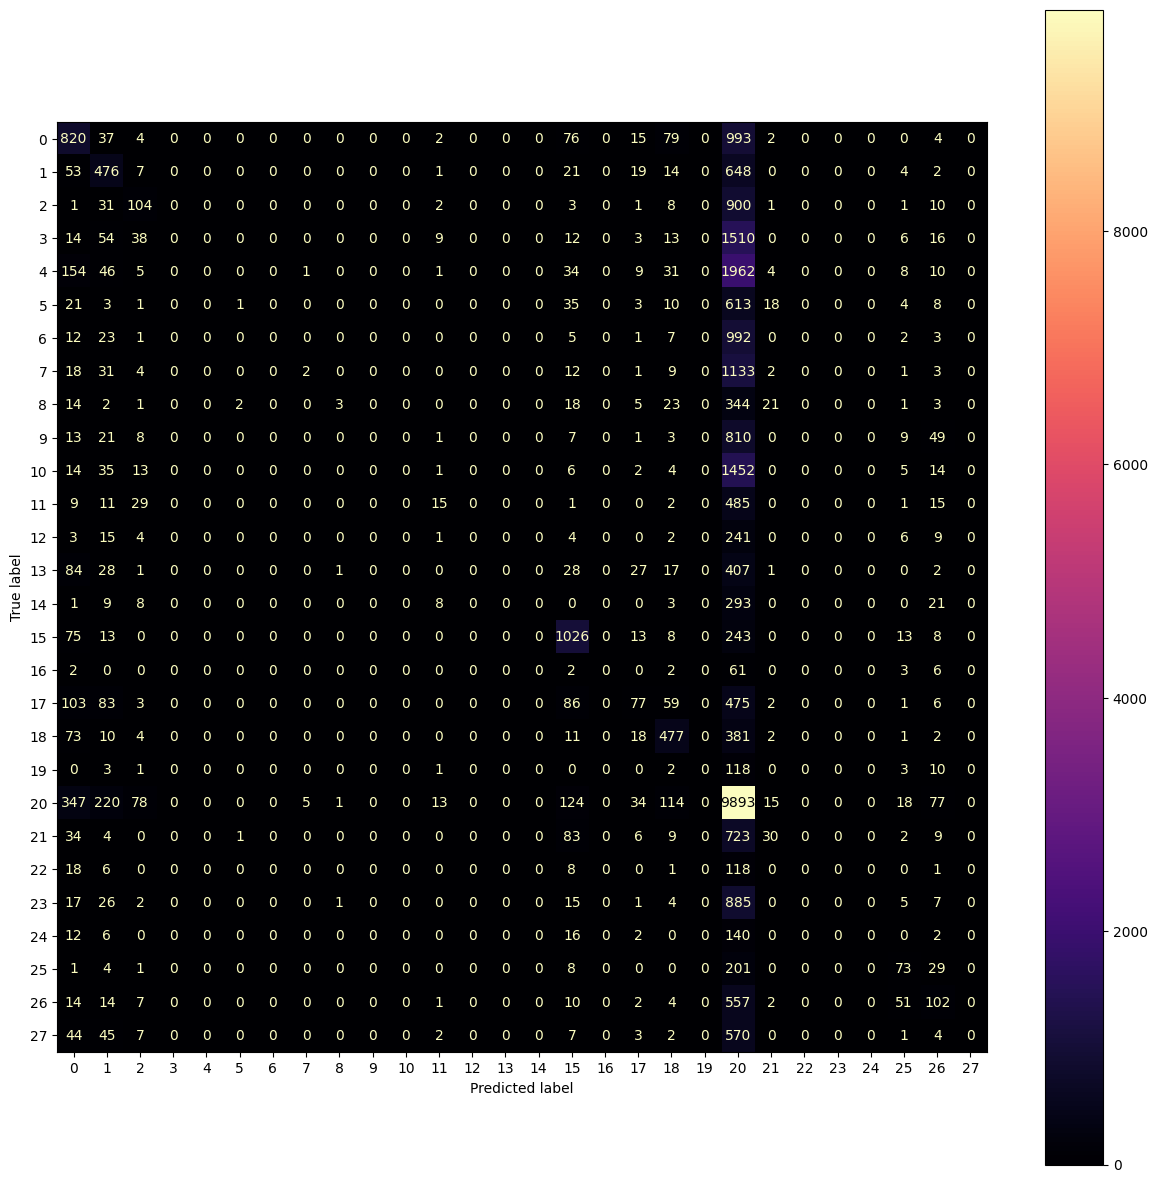

In [68]:
if (os.path.exists('models/new_split/MLP1GridCV_model_emb.pickle') and not skip):
    y_emo_predict = clf1.best_estimator_.predict(X_embed_avg_test)
    metrics(y_emo_test,y_emo_predict)
    print(f"Best estimator (Emotion): {clf1.best_estimator_}, Best Score: {clf1.best_score_}")
    metrics(y_emo_test,y_emo_predict)
    cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=y_emo_test,y_pred= y_emo_predict))
    fig, ax = plt.subplots(figsize=(15,15))
    cmp.plot(ax=ax,cmap='magma')
else:
    print("skipped")

Accuracy: 0.5286683556099123
Precision (Weighted): 0.5309688973786859
F1 Score (Weighted): 0.5197879984800959
F1 Score (Macro): 0.4713562891253894
              precision    recall  f1-score   support

           0       0.46      0.17      0.24      3910
           1       0.49      0.50      0.49      7696
           2       0.46      0.58      0.51     10939
           3       0.65      0.62      0.64     11796

    accuracy                           0.53     34341
   macro avg       0.51      0.47      0.47     34341
weighted avg       0.53      0.53      0.52     34341

Best estimator (Sentiment): MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(5, 10), max_iter=100, verbose=True), Best Score: 0.5237589168729073


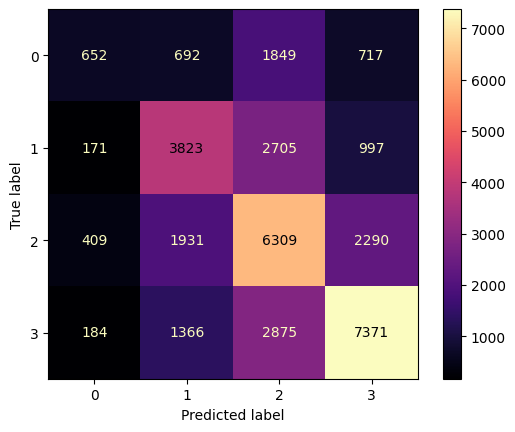

In [69]:
if (os.path.exists('models/new_split/MLP2GridCV_model_emb.pickle') and not skip):
    y_sent_predict = clf2.best_estimator_.predict(X_embed_avg_test)
    metrics(y_sent_test,y_sent_predict)
    print(f"Best estimator (Sentiment): {clf2.best_estimator_}, Best Score: {clf2.best_score_}")
    ConfusionMatrixDisplay.from_predictions(y_true=y_sent_test, y_pred=y_sent_predict, cmap='magma')
else:
    print("skipped")

<h2> 3.8 Applied to Other Models</h2>

In [70]:
if (os.path.exists('models/twitter.pickle')):
    pickle_in = open('models/twitter.pickle','rb')
    twitter = pickle.load(pickle_in)
    print("pickle file used")
else:
    model =gensim.downloader.load("glove-twitter-100")
    with open('models/twitter.pickle','wb') as f:
        pickle.dump(model, f)

    pickle_in = open('models/twitter.pickle','rb')
    twitter = pickle.load(pickle_in)

pickle file used


<h2> Load Twitter Model and Clean Data</h2>

In [71]:
model = gensim.downloader.load("glove-twitter-100")
X_train_emb,X_test_emb, y_emo_train, y_emo_test, y_sent_train, y_sent_test= train_test_split(post_tokens, encodedEmo, encodedSentiment, test_size = 0.2, train_size=0.8)
post_tokens_training = [] 

# Cleaning Twitter model
for post in X_train_emb:
    clean_post = [] 
    for word in post:
        if word in model:
            clean_post.append(word)
        else:
            continue
    post_tokens_training.append(clean_post)


# Average embed calculation
average_embeds_train = []
for post in post_tokens_training:
    token_embeddings = []
    for word in post:
        token_embeddings.append(model[word]) 
   
    average_embeds_train.append(np.mean(token_embeddings,axis=0)) 


posts_tokens_in_model_test = [] 

# Cleaning Twitter model
for post in X_test_emb:
    clean_test = [] 
    for word in post:
        if word in model:
            clean_test.append(word)
        else:
            continue
    posts_tokens_in_model_test.append(clean_test)

    
# Average embed calculation
average_embeds_test = []
for post in posts_tokens_in_model_test:
    token_embeddings = []
    for word in post:
        token_embeddings.append(model[word]) 
    average_embeds_test.append(np.mean(token_embeddings,axis=0))


X_embed_avg_train = average_embeds_train
X_embed_avg_test = average_embeds_test
print(f"Shape of training set: {np.shape(X_embed_avg_train)}")
print(f"Shape of test set: {np.shape(X_embed_avg_test)}")

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Shape of training set: (137456,)
Shape of test set: (34364,)


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [72]:
# Cleaning training and test sets
# RUN TWICE
for i in range(2):
    print(f"Shape of test set: {np.shape(X_embed_avg_test)}")
    print(np.shape(y_emo_test))

    # Remove empty posts
    for i in range(len(X_embed_avg_train)):
        if i >= len(X_embed_avg_train):
            break
        if X_embed_avg_train[i].shape == (100,):
            continue
        else:
            X_embed_avg_train.pop(i)
            y_emo_train = np.delete(y_emo_train, i)
            y_sent_train = np.delete(y_sent_train, i)

    # Remove empty posts
    for i in range(len(X_embed_avg_test)):
        if i >= len(X_embed_avg_test):
            break
        if X_embed_avg_test[i].shape == (100,):
            continue
        else:
            X_embed_avg_test.pop(i)
            y_emo_test = np.delete(y_emo_test, i)
            y_sent_test = np.delete(y_sent_test, i)


    print(f"Shape of training set: {np.shape(X_embed_avg_train)}")
    print(f"Shape of test set: {np.shape(X_embed_avg_test)}")
    print(np.shape(y_emo_test))

    # Convert to np array
    for i in range(len(X_embed_avg_train)):
        X_embed_avg_train[i] = np.array(X_embed_avg_train[i])

    for i in range(len(X_embed_avg_test)):
        X_embed_avg_test[i] = np.array(X_embed_avg_test[i])

Shape of test set: (34364,)
(34364,)
Shape of training set: (136769,)
Shape of test set: (34162,)
(34162,)
Shape of test set: (34162,)
(34162,)
Shape of training set: (136768, 100)
Shape of test set: (34161, 100)
(34161,)


<h2> Base-MLP </h2>

In [73]:
classifier = MLPClassifier(max_iter=100)

if (os.path.exists('models/Embeddings_Twitter_MLP_model.pickle')):
    pickle_in = open('models/Embeddings_Twitter_MLP_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print('pickle file used')
else:
    EMLP = classifier.fit(X_embed_avg_train, y_emo_train)
    with open('models/Embeddings_Twitter_MLP_model.pickle','wb') as f:
            pickle.dump(EMLP, f)
    pickle_in = open('models/Embeddings_Twitter_MLP_model.pickle','rb')
    clf1 = pickle.load(pickle_in)

        
if (os.path.exists('models/Embeddings_Twitter_MLP_model2.pickle')):
    pickle_in = open('models/Embeddings_Twitter_MLP_model2.pickle','rb')
    clf2 = pickle.load(pickle_in)
    print('pickle file used')
else:
    EMLP2 = classifier.fit(X_embed_avg_train, y_sent_train)
    with open('models/Embeddings_Twitter_MLP_model2.pickle','wb') as f:
            pickle.dump(EMLP2, f)
    pickle_in = open('models/Embeddings_Twitter_MLP_model2.pickle','rb')
    clf2 = pickle.load(pickle_in)


pickle file used
pickle file used


Score for Emotions: 0.3672023652703375
Accuracy: 0.3672023652703375
Precision (Weighted): 0.351702318227301
F1 Score (Weighted): 0.2598736942561774
F1 Score (Macro): 0.12051673498241841
              precision    recall  f1-score   support

           0       0.45      0.33      0.38      2126
           1       0.50      0.15      0.23      1247
           2       0.37      0.07      0.12      1082
           3       0.18      0.03      0.05      1663
           4       0.42      0.01      0.02      2193
           5       0.27      0.02      0.03       711
           6       0.27      0.01      0.02       952
           7       0.36      0.19      0.25      1176
           8       0.52      0.03      0.06       431
           9       0.36      0.01      0.01       934
          10       0.21      0.01      0.02      1622
          11       0.35      0.07      0.11       571
          12       0.00      0.00      0.00       285
          13       0.28      0.03      0.05       574
   

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_s

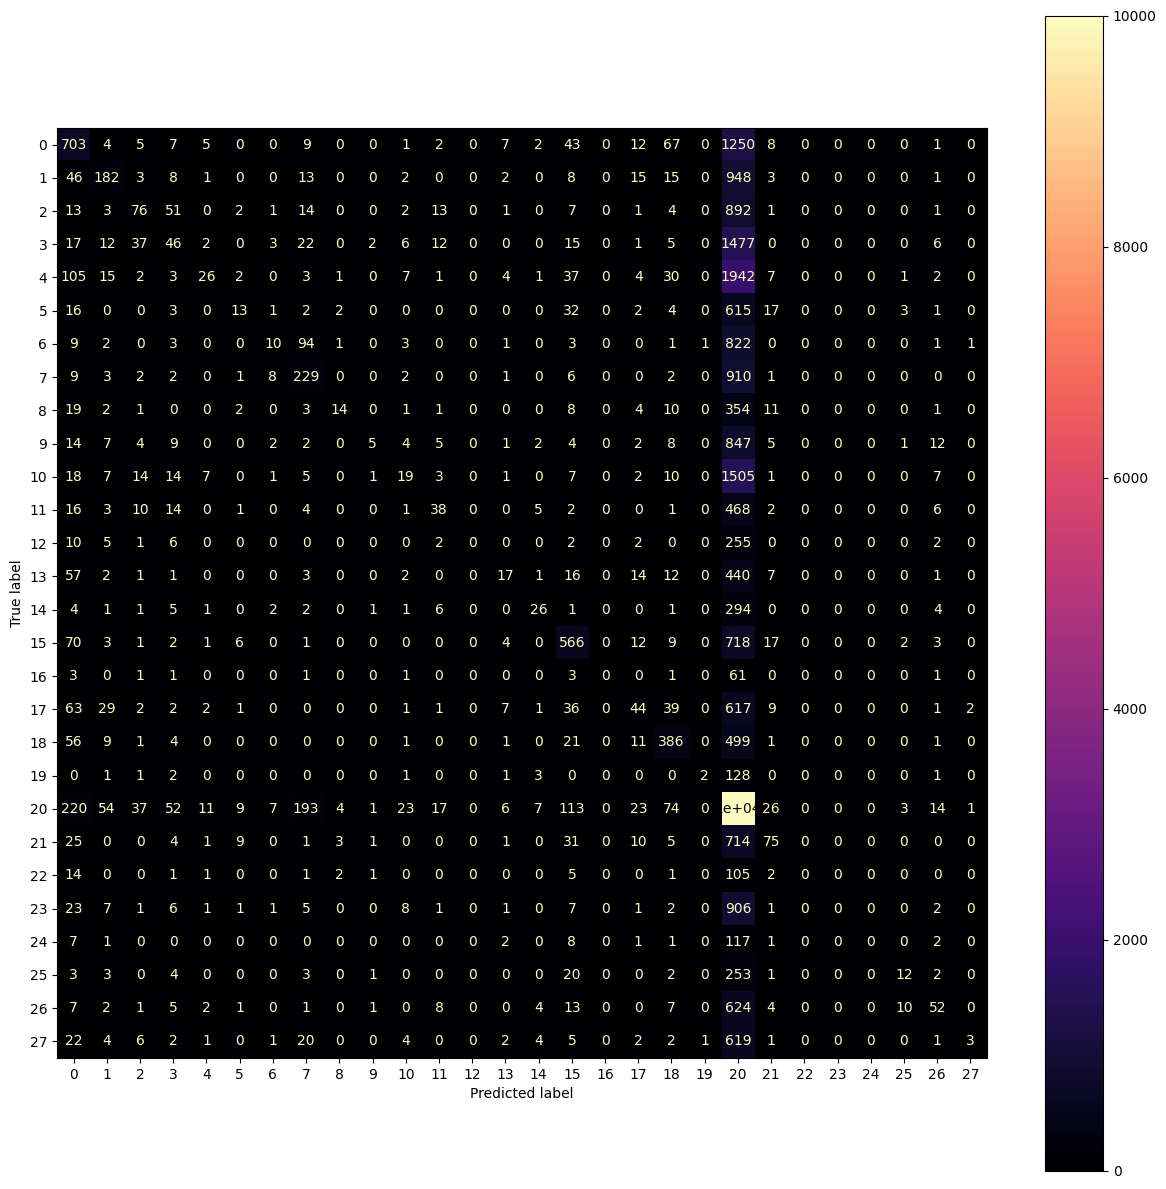

In [74]:
y_emo_predict = clf1.predict(X_embed_avg_test)
print(f"Score for Emotions: {clf1.score(X_embed_avg_test, y_emo_test)}")
metrics(y_emo_test, y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=y_emo_test, y_pred=y_emo_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax, cmap='magma')

Score for Sentiments: 0.493984368139106
Accuracy: 0.493984368139106
Precision (Weighted): 0.5063199340478586
F1 Score (Weighted): 0.4848765540030497
F1 Score (Macro): 0.44119518074614106
              precision    recall  f1-score   support

           0       0.53      0.16      0.24      3802
           1       0.47      0.43      0.45      7766
           2       0.42      0.57      0.49     10895
           3       0.60      0.57      0.58     11698

    accuracy                           0.49     34161
   macro avg       0.51      0.43      0.44     34161
weighted avg       0.51      0.49      0.48     34161



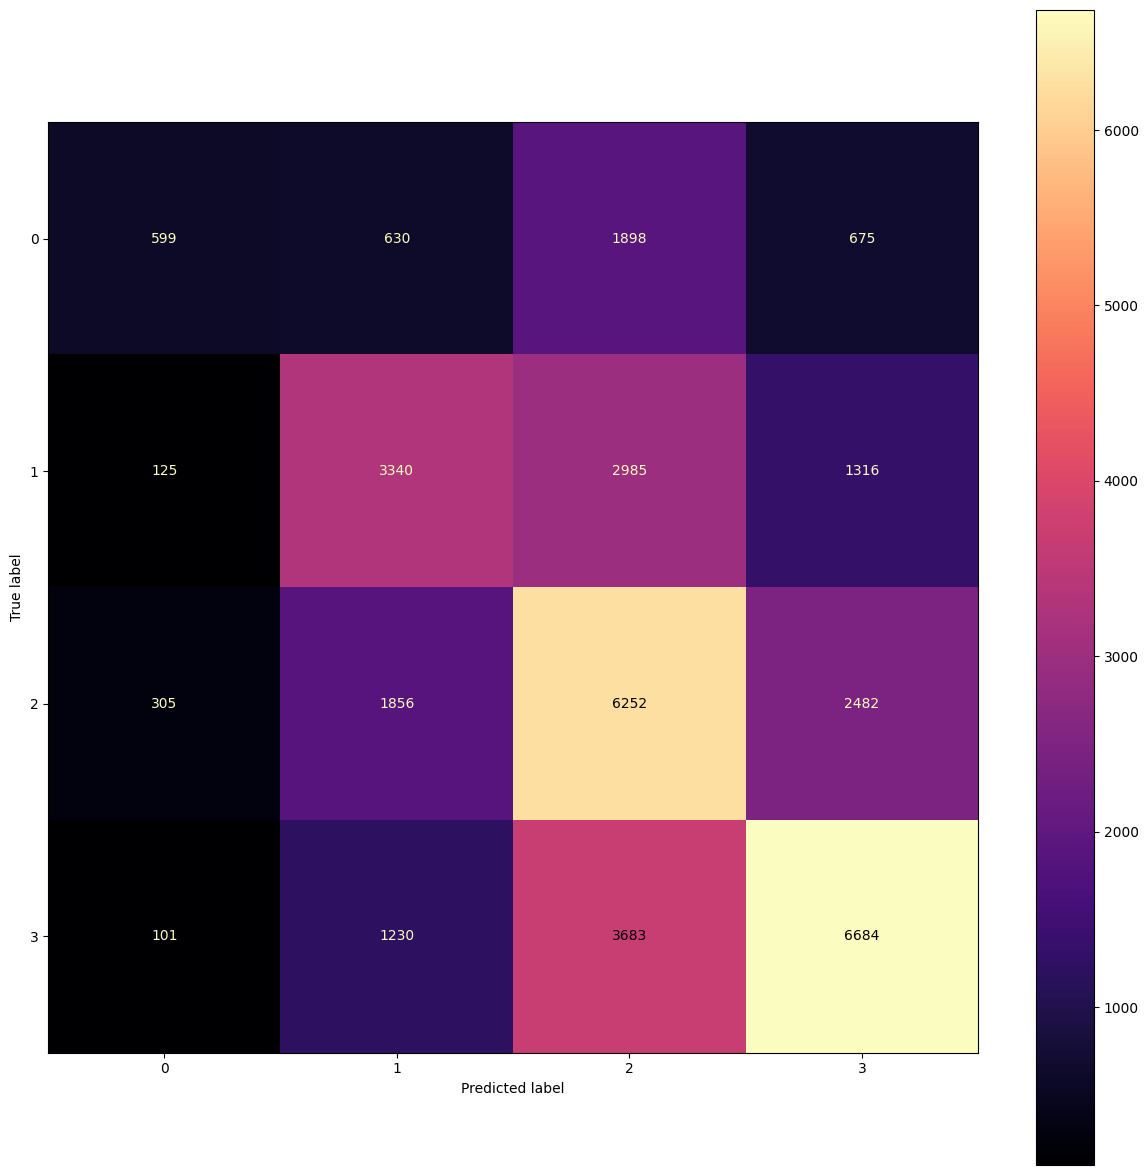

In [75]:
y_sent_predict = clf2.predict(X_embed_avg_test)
print(f"Score for Sentiments: {clf2.score(X_embed_avg_test, y_sent_test)}")
metrics(y_sent_test, y_sent_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=y_sent_test, y_pred=y_sent_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax, cmap='magma')

<h2> Top-MLP </h2>

In [76]:
parameters = {"activation":("identity", "logistic", "tanh", "relu"),"hidden_layer_sizes":((5,5),(5,10)), "solver":("adam","sgd")}
#currently 5 neurons then 5 neurons and 5 neurons then 10 neurons in the hidden layer
clfMLP = MLPClassifier(early_stopping=True,verbose=True, max_iter=100)
classifier = GridSearchCV(estimator=clfMLP, param_grid=parameters, n_jobs=-1)
skip=False
if(not skip):
    if (os.path.exists('models/new_split/MLP1GridCV_Twitter_model_emb.pickle')):
        pickle_in = open('models/new_split/MLP1GridCV_Twitter_model_emb.pickle','rb')
        clf1 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        X_embed_avg_train, y_emo_train
        classifier = classifier.fit(X_embed_avg_train, y_emo_train)
        with open('models/new_split/MLP1GridCV_Twitter_model_emb.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/new_split/MLP1GridCV_Twitter_model_emb.pickle','rb')
        clf1 = pickle.load(pickle_in)

    if (os.path.exists('models/new_split/MLP2GridCV_Twitter_model_emb.pickle')):
        pickle_in = open('models/new_split/MLP2GridCV_Twitter_model_emb.pickle','rb')
        clf2 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        classifier = classifier.fit(X_embed_avg_train,y_sent_train)
        with open('models/new_split/MLP2GridCV_Twitter_model_emb.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/new_split/MLP2GridCV_Twitter_model_emb.pickle','rb')
        clf2 = pickle.load(pickle_in)
else:
    print("skipped")

pickle file used
pickle file used


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.1.2 wh

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.3431691109745031
Precision (Weighted): 0.1988461346368912
F1 Score (Weighted): 0.20892115142632367
F1 Score (Macro): 0.059305656737451896
              precision    recall  f1-score   support

           0       0.36      0.29      0.32      2126
           1       0.00      0.00      0.00      1247
           2       0.23      0.03      0.05      1082
           3       0.00      0.00      0.00      1663
           4       0.00      0.00      0.00      2193
           5       1.00      0.00      0.00       711
           6       0.00      0.00      0.00       952
           7       0.31      0.08      0.12      1176
           8       0.00      0.00      0.00       431
           9       0.00      0.00      0.00       934
          10       0.00      0.00      0.00      1622
          11       0.00      0.00      0.00       571
          12       0.00      0.00      0.00       285
          13       0.00      0.00      0.00       574
          14       0.00      0.00      

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_s

              precision    recall  f1-score   support

           0       0.36      0.29      0.32      2126
           1       0.00      0.00      0.00      1247
           2       0.23      0.03      0.05      1082
           3       0.00      0.00      0.00      1663
           4       0.00      0.00      0.00      2193
           5       1.00      0.00      0.00       711
           6       0.00      0.00      0.00       952
           7       0.31      0.08      0.12      1176
           8       0.00      0.00      0.00       431
           9       0.00      0.00      0.00       934
          10       0.00      0.00      0.00      1622
          11       0.00      0.00      0.00       571
          12       0.00      0.00      0.00       285
          13       0.00      0.00      0.00       574
          14       0.00      0.00      0.00       350
          15       0.40      0.39      0.39      1415
          16       0.00      0.00      0.00        73
          17       0.00    

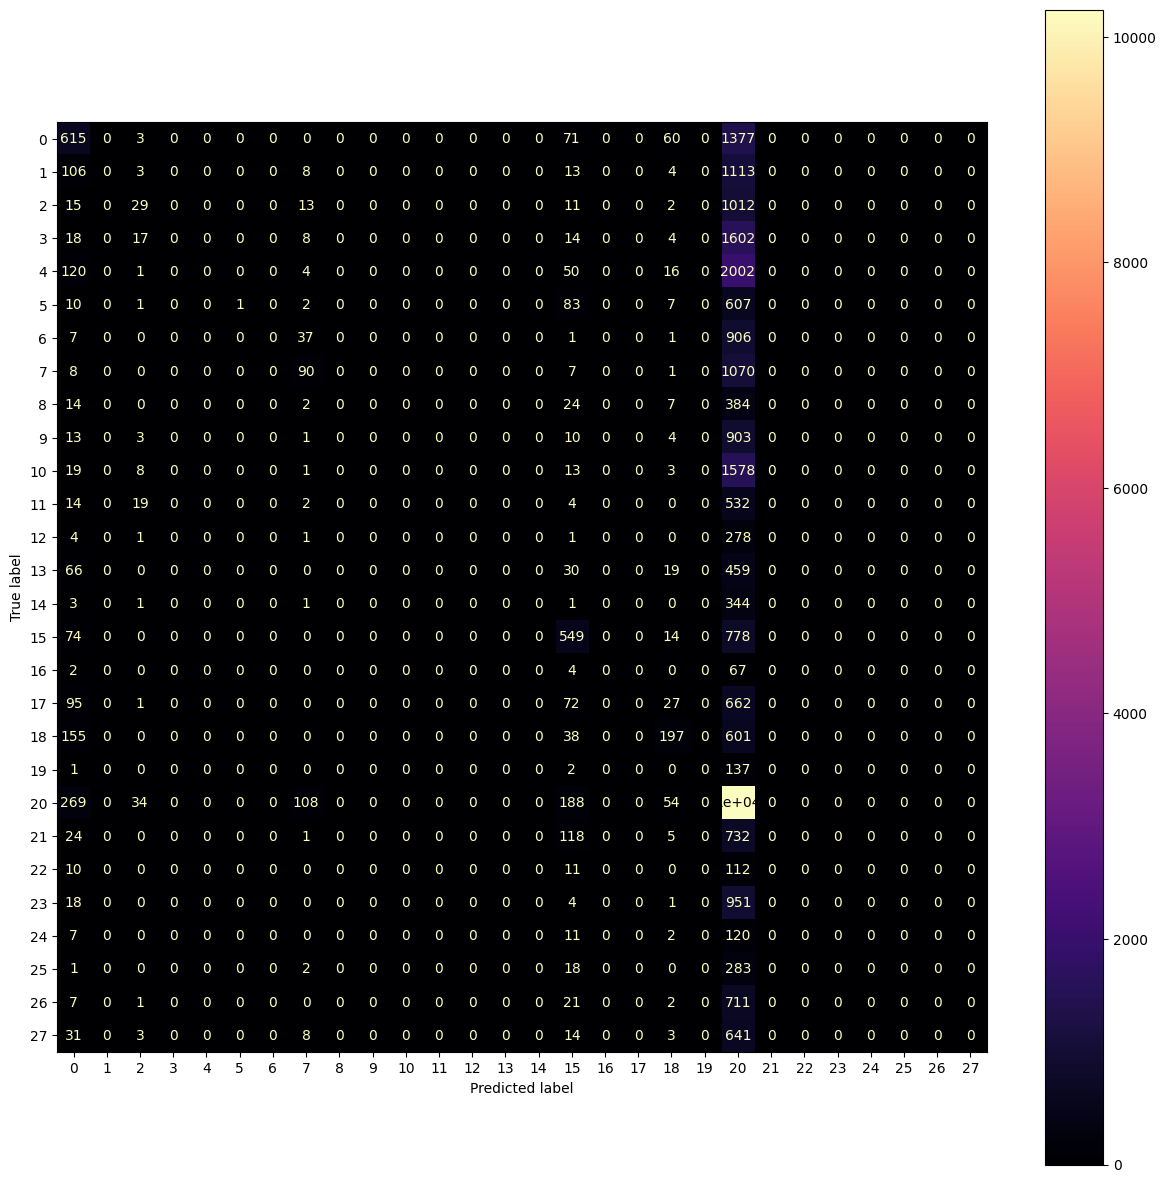

In [77]:
if (os.path.exists('models/new_split/MLP1GridCV_Twitter_model_emb.pickle') and not skip):
    y_emo_predict = clf1.best_estimator_.predict(X_embed_avg_test)
    metrics(y_emo_test,y_emo_predict)
    print(f"Best estimator (Emotion): {clf1.best_estimator_}, Best Score: {clf1.best_score_}")
    metrics(y_emo_test,y_emo_predict)
    cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=y_emo_test,y_pred= y_emo_predict))
    fig, ax = plt.subplots(figsize=(15,15))
    cmp.plot(ax=ax,cmap='magma')
else:
    print("skipped")

Accuracy: 0.4909692339217236
Precision (Weighted): 0.4878159484570205
F1 Score (Weighted): 0.48584613382090264
F1 Score (Macro): 0.45567286948571006
              precision    recall  f1-score   support

           0       0.45      0.25      0.32      3802
           1       0.45      0.46      0.46      7766
           2       0.44      0.46      0.45     10895
           3       0.57      0.62      0.59     11698

    accuracy                           0.49     34161
   macro avg       0.48      0.45      0.46     34161
weighted avg       0.49      0.49      0.49     34161

Best estimator (Sentiment): MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(5, 10), max_iter=100, verbose=True), Best Score: 0.48648512567740354


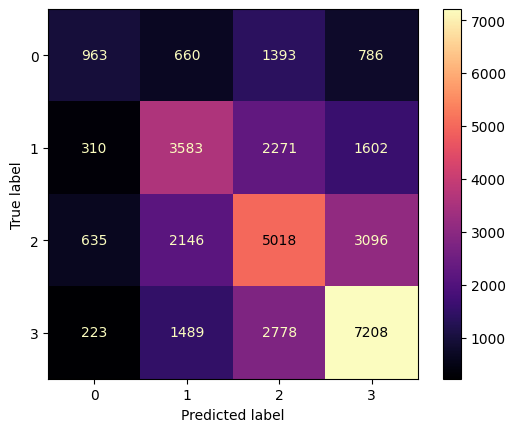

In [78]:
if (os.path.exists('models/new_split/MLP2GridCV_Twitter_model_emb.pickle') and not skip):
    y_sent_predict = clf2.best_estimator_.predict(X_embed_avg_test)
    metrics(y_sent_test,y_sent_predict)
    print(f"Best estimator (Sentiment): {clf2.best_estimator_}, Best Score: {clf2.best_score_}")
    ConfusionMatrixDisplay.from_predictions(y_true=y_sent_test, y_pred=y_sent_predict, cmap='magma')
else:
    print("skipped")

<h2> Wiki Model </h2>

In [79]:
if (os.path.exists('models/wiki.pickle')):
    pickle_in = open('models/wiki.pickle','rb')
    wiki = pickle.load(pickle_in)
    print("pickle file used")
else:
    model =gensim.downloader.load("glove-wiki-gigaword-300")
    with open('models/wiki.pickle','wb') as f:
        pickle.dump(model, f)

    pickle_in = open('models/wiki.pickle','rb')
    wiki = pickle.load(pickle_in)

pickle file used


<h2> Cleaning Data </h2>

In [80]:
model = gensim.downloader.load("glove-wiki-gigaword-300")
X_train_emb,X_test_emb, y_emo_train, y_emo_test, y_sent_train, y_sent_test= train_test_split(post_tokens, encodedEmo, encodedSentiment, test_size = 0.2, train_size=0.8)
post_tokens_training = [] 

# Cleaning Wiki model
for post in X_train_emb:
    clean_post = [] 
    for word in post:
        if word in model:
            clean_post.append(word)
        else:
            continue
    post_tokens_training.append(clean_post)

    
# Average embed calculation
average_embeds_train = []
for post in post_tokens_training:
    token_embeddings = []
    for word in post:
        token_embeddings.append(model[word]) 
   
    average_embeds_train.append(np.mean(token_embeddings,axis=0)) 


posts_tokens_in_model_test = [] 
# Cleaning Wiki model
for post in X_test_emb:
    clean_test = [] 
    for word in post:
        if word in model:
            clean_test.append(word)
        else:
            continue
    posts_tokens_in_model_test.append(clean_test)

    
# Average embed calculation
average_embeds_test = []
for post in posts_tokens_in_model_test:
    token_embeddings = []
    for word in post:
        token_embeddings.append(model[word])
    average_embeds_test.append(np.mean(token_embeddings,axis=0)) 


X_embed_avg_train = average_embeds_train
X_embed_avg_test = average_embeds_test
print(f"Shape of training set: {np.shape(X_embed_avg_train)}")
print(f"Shape of test set: {np.shape(X_embed_avg_test)}")

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Shape of training set: (137456,)
Shape of test set: (34364,)


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [81]:
#clean training and test sets
# RUN TWICE
for i in range(2):
    print(f"Shape of test set: {np.shape(X_embed_avg_test)}")
    print(np.shape(y_emo_test))

    # Remove empty posts
    for i in range(len(X_embed_avg_train)):
        if i >= len(X_embed_avg_train):
            break
        if X_embed_avg_train[i].shape == (300,):
            continue
        else:
            X_embed_avg_train.pop(i)
            y_emo_train = np.delete(y_emo_train, i)
            y_sent_train = np.delete(y_sent_train, i)

    # Remove empty posts
    for i in range(len(X_embed_avg_test)):
        if i >= len(X_embed_avg_test):
            break
        if X_embed_avg_test[i].shape == (300,):
            continue
        else:
            X_embed_avg_test.pop(i)
            y_emo_test = np.delete(y_emo_test, i)
            y_sent_test = np.delete(y_sent_test, i)


    print(f"Shape of training set: {np.shape(X_embed_avg_train)}")
    print(f"Shape of test set: {np.shape(X_embed_avg_test)}")
    print(np.shape(y_emo_test))

    # Convert to np array
    for i in range(len(X_embed_avg_train)):
        X_embed_avg_train[i] = np.array(X_embed_avg_train[i])

    for i in range(len(X_embed_avg_test)):
        X_embed_avg_test[i] = np.array(X_embed_avg_test[i])

Shape of test set: (34364,)
(34364,)
Shape of training set: (136791,)
Shape of test set: (34177, 300)
(34177,)
Shape of test set: (34177, 300)
(34177,)
Shape of training set: (136788, 300)
Shape of test set: (34177, 300)
(34177,)


<h2> Base-MLP</h2>

In [82]:
classifier = MLPClassifier(max_iter=100)

if (os.path.exists('models/Embeddings_Wiki_MLP_model.pickle')):
    pickle_in = open('models/Embeddings_Wiki_MLP_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print('pickle file used')
else:
    EMLP = classifier.fit(X_embed_avg_train, y_emo_train)
    with open('models/Embeddings_Wiki_MLP_model.pickle','wb') as f:
            pickle.dump(EMLP, f)
    pickle_in = open('models/Embeddings_Wiki_MLP_model.pickle','rb')
    clf1 = pickle.load(pickle_in)

        
if (os.path.exists('models/Embeddings_Wiki_MLP_model2.pickle')):
    pickle_in = open('models/Embeddings_Wiki_MLP_model2.pickle','rb')
    clf2 = pickle.load(pickle_in)
    print('pickle file used')
else:
    EMLP2 = classifier.fit(X_embed_avg_train, y_sent_train)
    with open('models/Embeddings_Wiki_MLP_model2.pickle','wb') as f:
            pickle.dump(EMLP2, f)
    pickle_in = open('models/Embeddings_Wiki_MLP_model2.pickle','rb')
    clf2 = pickle.load(pickle_in)

pickle file used
pickle file used


Score for Emotions: 0.4217456183983381
Accuracy: 0.4217456183983381
Precision (Weighted): 0.4356427718387214
F1 Score (Weighted): 0.3440387773038713
F1 Score (Macro): 0.24368513286906604
              precision    recall  f1-score   support

           0       0.59      0.38      0.46      2003
           1       0.54      0.41      0.47      1247
           2       0.43      0.17      0.25       979
           3       0.29      0.03      0.06      1663
           4       0.44      0.04      0.07      2258
           5       0.42      0.11      0.18       686
           6       0.41      0.04      0.08       987
           7       0.43      0.26      0.32      1184
           8       0.55      0.11      0.18       435
           9       0.27      0.03      0.05       918
          10       0.33      0.09      0.14      1588
          11       0.38      0.19      0.25       576
          12       0.57      0.16      0.24       295
          13       0.43      0.11      0.17       599
  

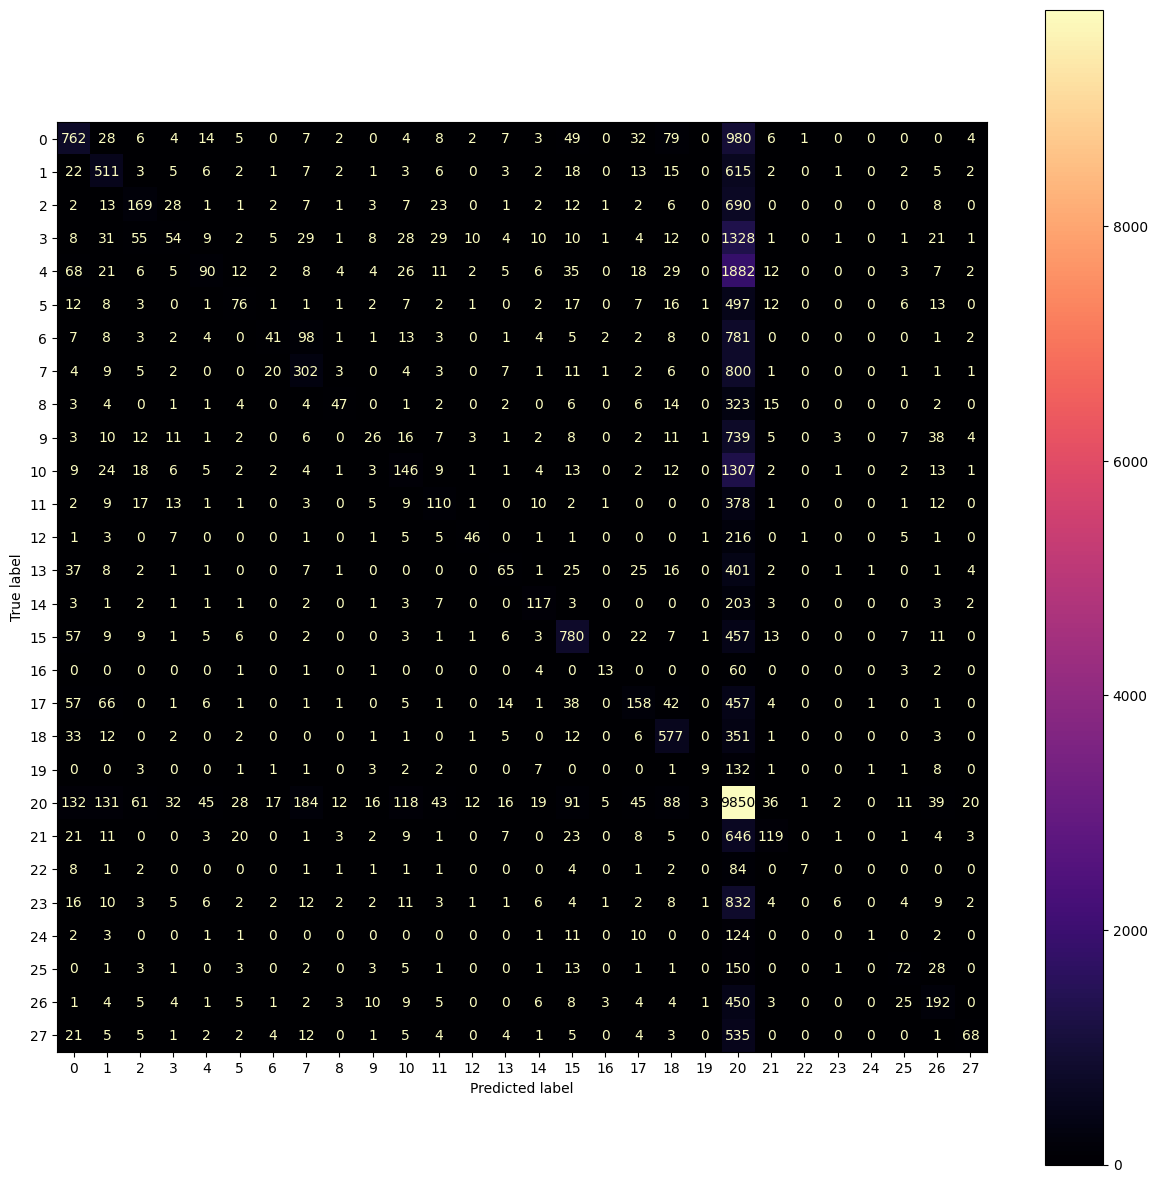

In [83]:
y_emo_predict = clf1.predict(X_embed_avg_test)
print(f"Score for Emotions: {clf1.score(X_embed_avg_test, y_emo_test)}")
metrics(y_emo_test, y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=y_emo_test, y_pred=y_emo_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax, cmap='magma')

Score for Sentiments: 0.5804488398630658
Accuracy: 0.5804488398630658
Precision (Weighted): 0.5938576402251708
F1 Score (Weighted): 0.5768074114045715
F1 Score (Macro): 0.5405123029746141
              precision    recall  f1-score   support

           0       0.57      0.27      0.36      3809
           1       0.57      0.58      0.58      7662
           2       0.49      0.64      0.56     11057
           3       0.71      0.63      0.67     11649

    accuracy                           0.58     34177
   macro avg       0.59      0.53      0.54     34177
weighted avg       0.59      0.58      0.58     34177



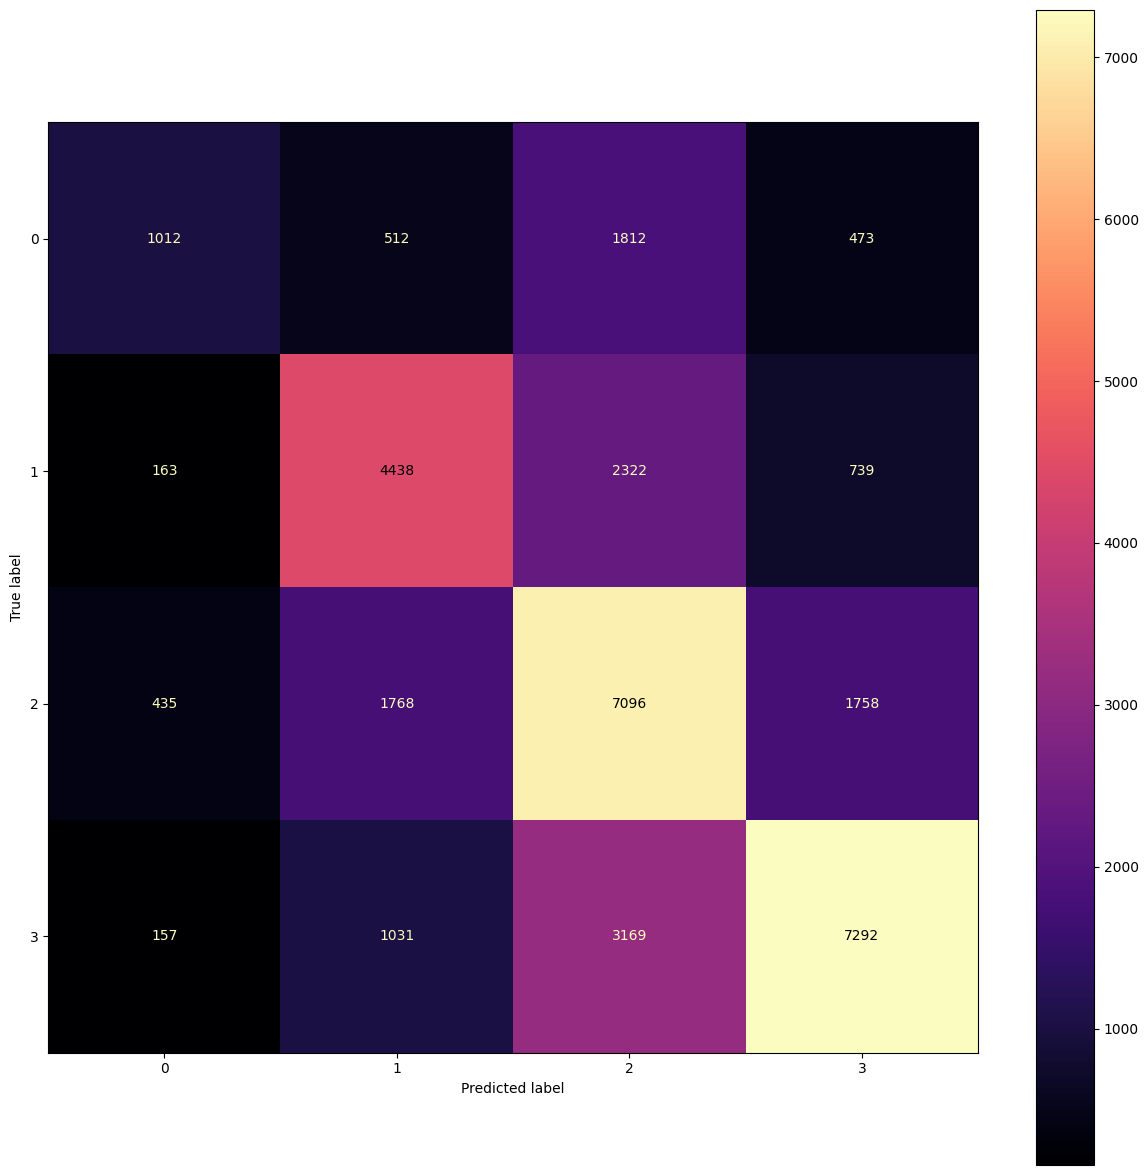

In [84]:
y_sent_predict = clf2.predict(X_embed_avg_test)
print(f"Score for Sentiments: {clf2.score(X_embed_avg_test, y_sent_test)}")
metrics(y_sent_test, y_sent_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=y_sent_test, y_pred=y_sent_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax, cmap='magma')

<h2> Top-MLP </h2>

In [85]:
parameters = {"activation":("identity", "logistic", "tanh", "relu"),"hidden_layer_sizes":((5,5),(5,10)), "solver":("adam","sgd")}
#currently 5 neurons then 5 neurons and 5 neurons then 10 neurons in the hidden layer
clfMLP = MLPClassifier(early_stopping=True,verbose=True, max_iter=100)
classifier = GridSearchCV(estimator=clfMLP, param_grid=parameters, n_jobs=-1)
skip=False
if(not skip):
    if (os.path.exists('models/new_split/MLP1GridCV_Wiki_model_emb.pickle')):
        pickle_in = open('models/new_split/MLP1GridCV_Wiki_model_emb.pickle','rb')
        clf1 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        X_embed_avg_train, y_emo_train
        classifier = classifier.fit(X_embed_avg_train, y_emo_train)
        with open('models/new_split/MLP1GridCV_Wiki_model_emb.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/new_split/MLP1GridCV_Wiki_model_emb.pickle','rb')
        clf1 = pickle.load(pickle_in)

    if (os.path.exists('models/new_split/MLP2GridCV_Wiki_model_emb.pickle')):
        pickle_in = open('models/new_split/MLP2GridCV_Wiki_model_emb.pickle','rb')
        clf2 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        classifier = classifier.fit(X_embed_avg_train,y_sent_train)
        with open('models/new_split/MLP2GridCV_Wiki_model_emb.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/new_split/MLP2GridCV_Wiki_model_emb.pickle','rb')
        clf2 = pickle.load(pickle_in)
else:
    print("skipped")

pickle file used
pickle file used


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.1.2 wh

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.3563507622085028
Precision (Weighted): 0.231721142579977
F1 Score (Weighted): 0.23500804628267397
F1 Score (Macro): 0.08646508597608264
              precision    recall  f1-score   support

           0       0.39      0.30      0.34      2003
           1       0.41      0.21      0.28      1247
           2       0.31      0.06      0.10       979
           3       0.00      0.00      0.00      1663
           4       0.00      0.00      0.00      2258
           5       0.00      0.00      0.00       686
           6       0.00      0.00      0.00       987
           7       0.33      0.13      0.18      1184
           8       0.00      0.00      0.00       435
           9       0.00      0.00      0.00       918
          10       0.00      0.00      0.00      1588
          11       0.00      0.00      0.00       576
          12       0.00      0.00      0.00       295
          13       0.00      0.00      0.00       599
          14       0.29      0.01      0.

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           0       0.39      0.30      0.34      2003
           1       0.41      0.21      0.28      1247
           2       0.31      0.06      0.10       979
           3       0.00      0.00      0.00      1663
           4       0.00      0.00      0.00      2258
           5       0.00      0.00      0.00       686
           6       0.00      0.00      0.00       987
           7       0.33      0.13      0.18      1184
           8       0.00      0.00      0.00       435
           9       0.00      0.00      0.00       918
          10       0.00      0.00      0.00      1588
          11       0.00      0.00      0.00       576
          12       0.00      0.00      0.00       295
          13       0.00      0.00      0.00       599
          14       0.29      0.01      0.02       353
          15       0.50      0.29      0.37      1401
          16       0.00      0.00      0.00        85
          17       0.32    

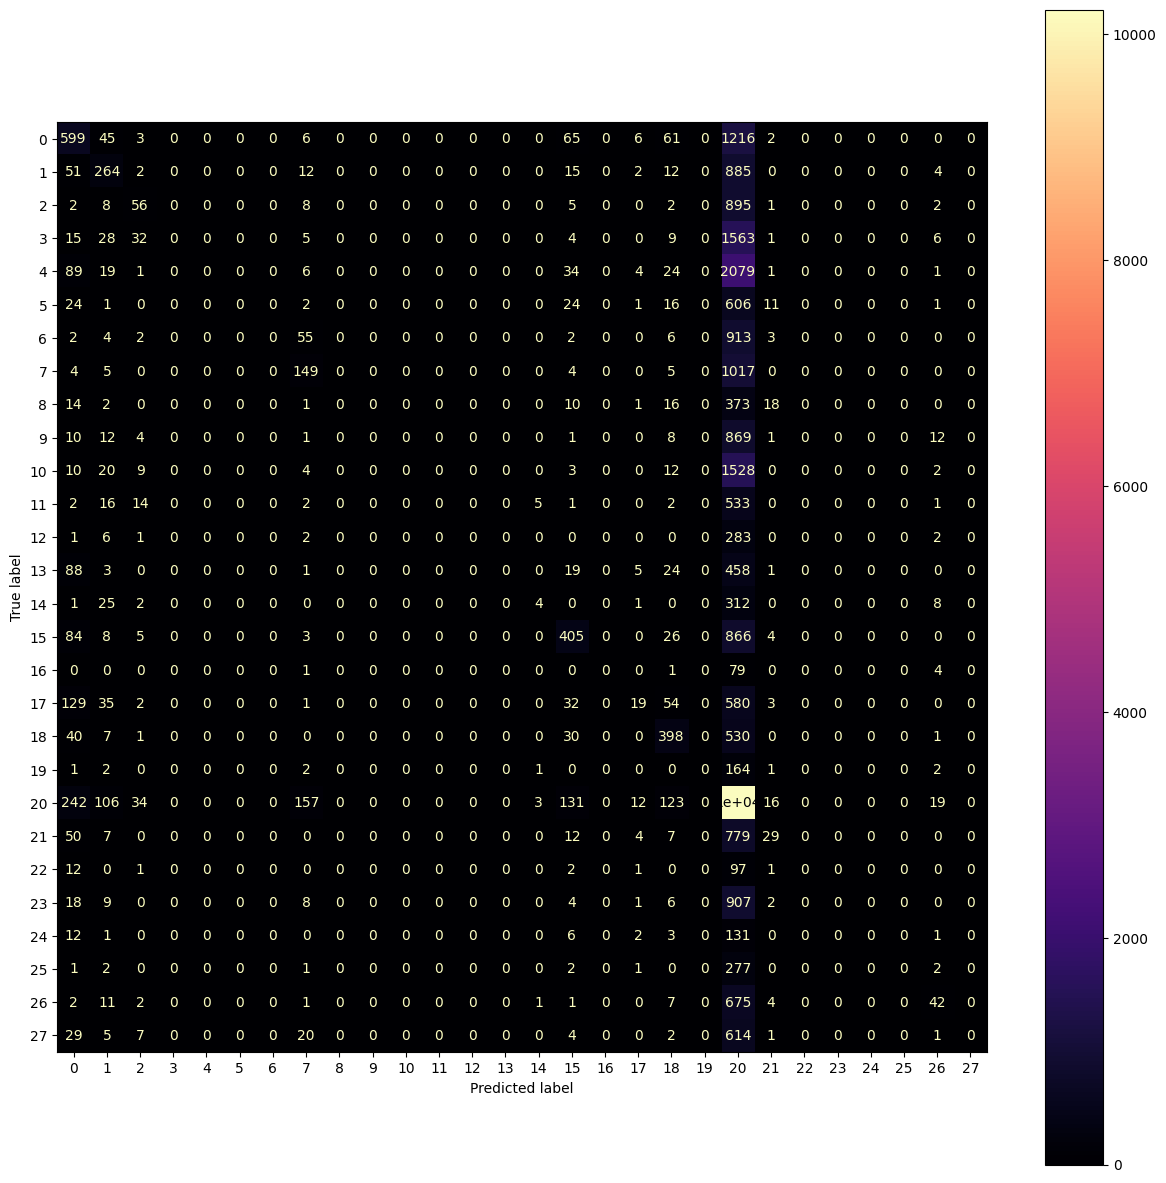

In [86]:
if (os.path.exists('models/new_split/MLP1GridCV_Wiki_model_emb.pickle') and not skip):
    y_emo_predict = clf1.best_estimator_.predict(X_embed_avg_test)
    metrics(y_emo_test,y_emo_predict)
    print(f"Best estimator (Emotion): {clf1.best_estimator_}, Best Score: {clf1.best_score_}")
    metrics(y_emo_test,y_emo_predict)
    cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=y_emo_test,y_pred= y_emo_predict))
    fig, ax = plt.subplots(figsize=(15,15))
    cmp.plot(ax=ax,cmap='magma')
else:
    print("skipped")

Accuracy: 0.49556719431196417
Precision (Weighted): 0.4961439915824927
F1 Score (Weighted): 0.49237779732073167
F1 Score (Macro): 0.4614754681132779
              precision    recall  f1-score   support

           0       0.42      0.27      0.33      3809
           1       0.49      0.44      0.46      7662
           2       0.43      0.52      0.47     11057
           3       0.59      0.59      0.59     11649

    accuracy                           0.50     34177
   macro avg       0.48      0.45      0.46     34177
weighted avg       0.50      0.50      0.49     34177

Best estimator (Sentiment): MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(5, 10), max_iter=100, verbose=True), Best Score: 0.49279812824449803


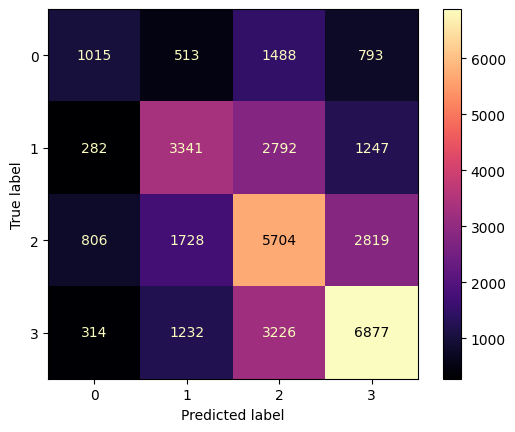

In [87]:
if (os.path.exists('models/new_split/MLP2GridCV_Wiki_model_emb.pickle') and not skip):
    y_sent_predict = clf2.best_estimator_.predict(X_embed_avg_test)
    metrics(y_sent_test,y_sent_predict)
    print(f"Best estimator (Sentiment): {clf2.best_estimator_}, Best Score: {clf2.best_score_}")
    ConfusionMatrixDisplay.from_predictions(y_true=y_sent_test, y_pred=y_sent_predict, cmap='magma')
else:
    print("skipped")